In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Dataset.csv')

In [3]:
backup = data.copy()

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### EDA Overview:
- Loan Id needs to be removed ( No use ) ✔️
- Null Values in Gender Column (Can use Mode/drop) ✔️
- Null Values in Married Column (Can use Mode/drop) ✔️
- Dependents has Null Values ✔️
- Dependents is object type and need to change to int (check unique values) ✔️
- Self_Employed contain Null Values ✔️
- Loan Amount contains Null Values ✔️
- Loan Amount Term contains Null Values ✔️
- Credit History contains Null Values ✔️
- Rename Column Names to better names ✔️

In [6]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
data.drop(columns='Loan_ID', inplace=True)

In [8]:
data.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [9]:
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']=data['Married'].fillna(data['Married'].mode()[0])

In [10]:
data['Dependents']=data['Dependents'].str.replace('3+','3', regex=False)

In [11]:
data['Dependents'].unique()

array(['0', '1', '2', '3', nan], dtype=object)

In [12]:
data['Dependents']=data['Dependents'].fillna(np.mean([0,1,2,3]))

In [13]:
data['Dependents']=data['Dependents'].astype(int)

In [14]:
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [15]:
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mean())

In [16]:
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())

In [17]:
data['Credit_History']=data['Credit_History'].mean()

In [18]:
data['Credit_History']=backup['Credit_History']

In [19]:
data['Credit_History']=data['Credit_History'].fillna(round(data['Credit_History'].mean()))

In [20]:
data['Credit_History'].unique()

array([1., 0.])

In [21]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [22]:
data.rename(
    columns={'ApplicantIncome':'Applicant_Income','CoapplicantIncome':'Coapplicant_Income',
            'Loan_Amount_Term':'LoanAmount_Term'}, inplace=True
)

In [23]:
data.rename(
    columns={'LoanAmount':'Loan_Amount',
            'Loan_AmountTerm':'Loan_Amount_Term'}, inplace=True
)

In [24]:
data.head(3)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,LoanAmount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              614 non-null    object 
 1   Married             614 non-null    object 
 2   Dependents          614 non-null    int64  
 3   Education           614 non-null    object 
 4   Self_Employed       614 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    float64
 8   LoanAmount_Term     614 non-null    float64
 9   Credit_History      614 non-null    float64
 10  Property_Area       614 non-null    object 
 11  Loan_Status         614 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 57.7+ KB


In [26]:
data.to_csv('Cleaned_Dataset')

Text(0.5, 1.0, 'Gender Comparison')

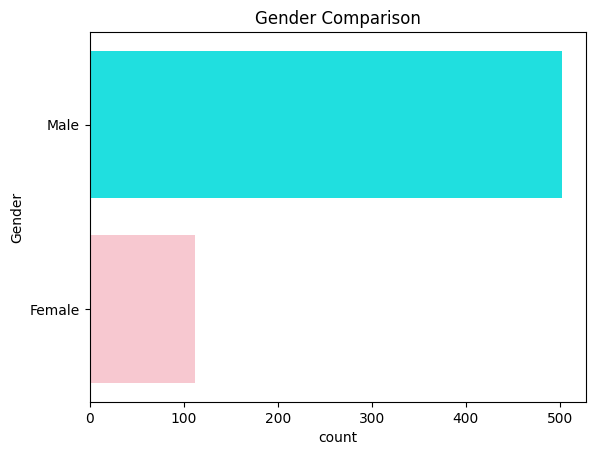

In [27]:
sns.countplot(data['Gender'],palette=['aqua','pink'])
plt.title('Gender Comparison')

In [28]:
data.groupby(data['Dependents'])['Dependents'].sum()

Dependents
0      0
1    117
2    202
3    153
Name: Dependents, dtype: int64

Text(0.5, 1.0, 'Income Vs Loan Ammount (Loan Status)')

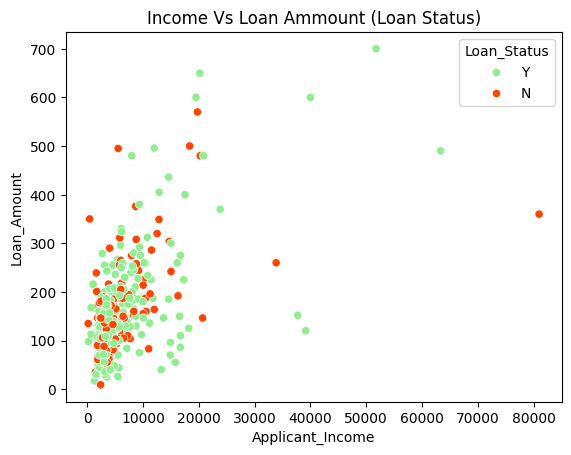

In [29]:

sns.scatterplot(x='Applicant_Income',y='Loan_Amount',data=data,hue='Loan_Status',
                palette=['lightgreen','orangered'])
plt.title('Income Vs Loan Ammount (Loan Status)')

Text(0.5, 1.0, 'Average Income of the Applicant Vs Loan Approval')

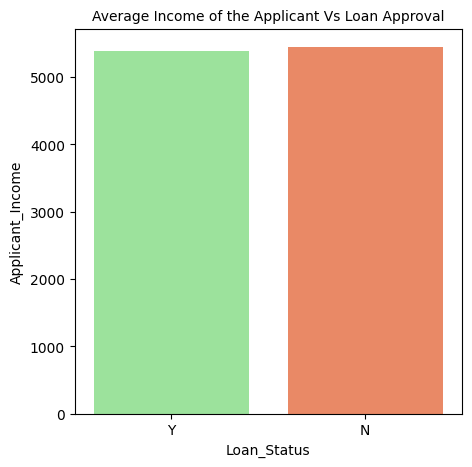

In [30]:
plt.figure(figsize=[5,5])
sns.barplot(x=data['Loan_Status'],y=data['Applicant_Income'],palette=['lightgreen','coral'],estimator=np.mean,ci=None)
plt.title('Average Income of the Applicant Vs Loan Approval', fontdict={'color':'black','fontsize':'10'})

In [31]:
data['Credit_History'].unique()

array([1., 0.])

Text(0.5, 1.0, 'Loan Approval based on Credit History')

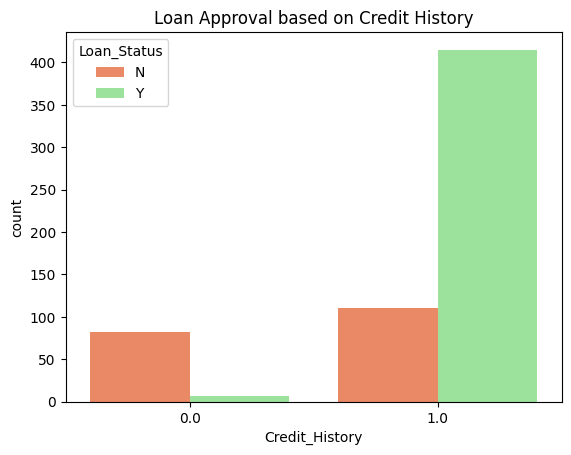

In [32]:
sns.countplot(x='Credit_History', hue='Loan_Status', data=data, palette=['coral','lightgreen'] )
plt.title('Loan Approval based on Credit History')

Text(0.5, 1.0, 'Loan Approval based on Gender')

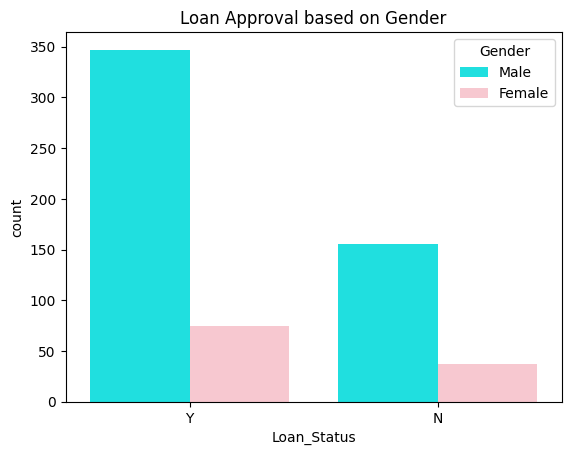

In [90]:
sns.countplot(x='Loan_Status',data=data, hue='Gender',palette=['aqua','pink'])
plt.title('Loan Approval based on Gender')

<Axes: xlabel='LoanAmount_Term', ylabel='count'>

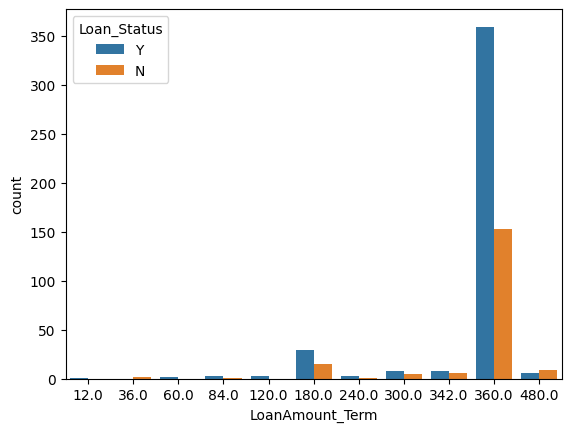

In [93]:
sns.countplot(x='LoanAmount_Term', data=data, hue='Loan_Status')

In [33]:
data.describe()

,Dependents,Applicant_Income,Coapplicant_Income,Loan_Amount,LoanAmount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.768730,5403.459283,1621.245798,146.412162,342.000000,0.855049
std,1.003387,6109.041673,2926.248369,84.037468,64.372489,0.352339
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


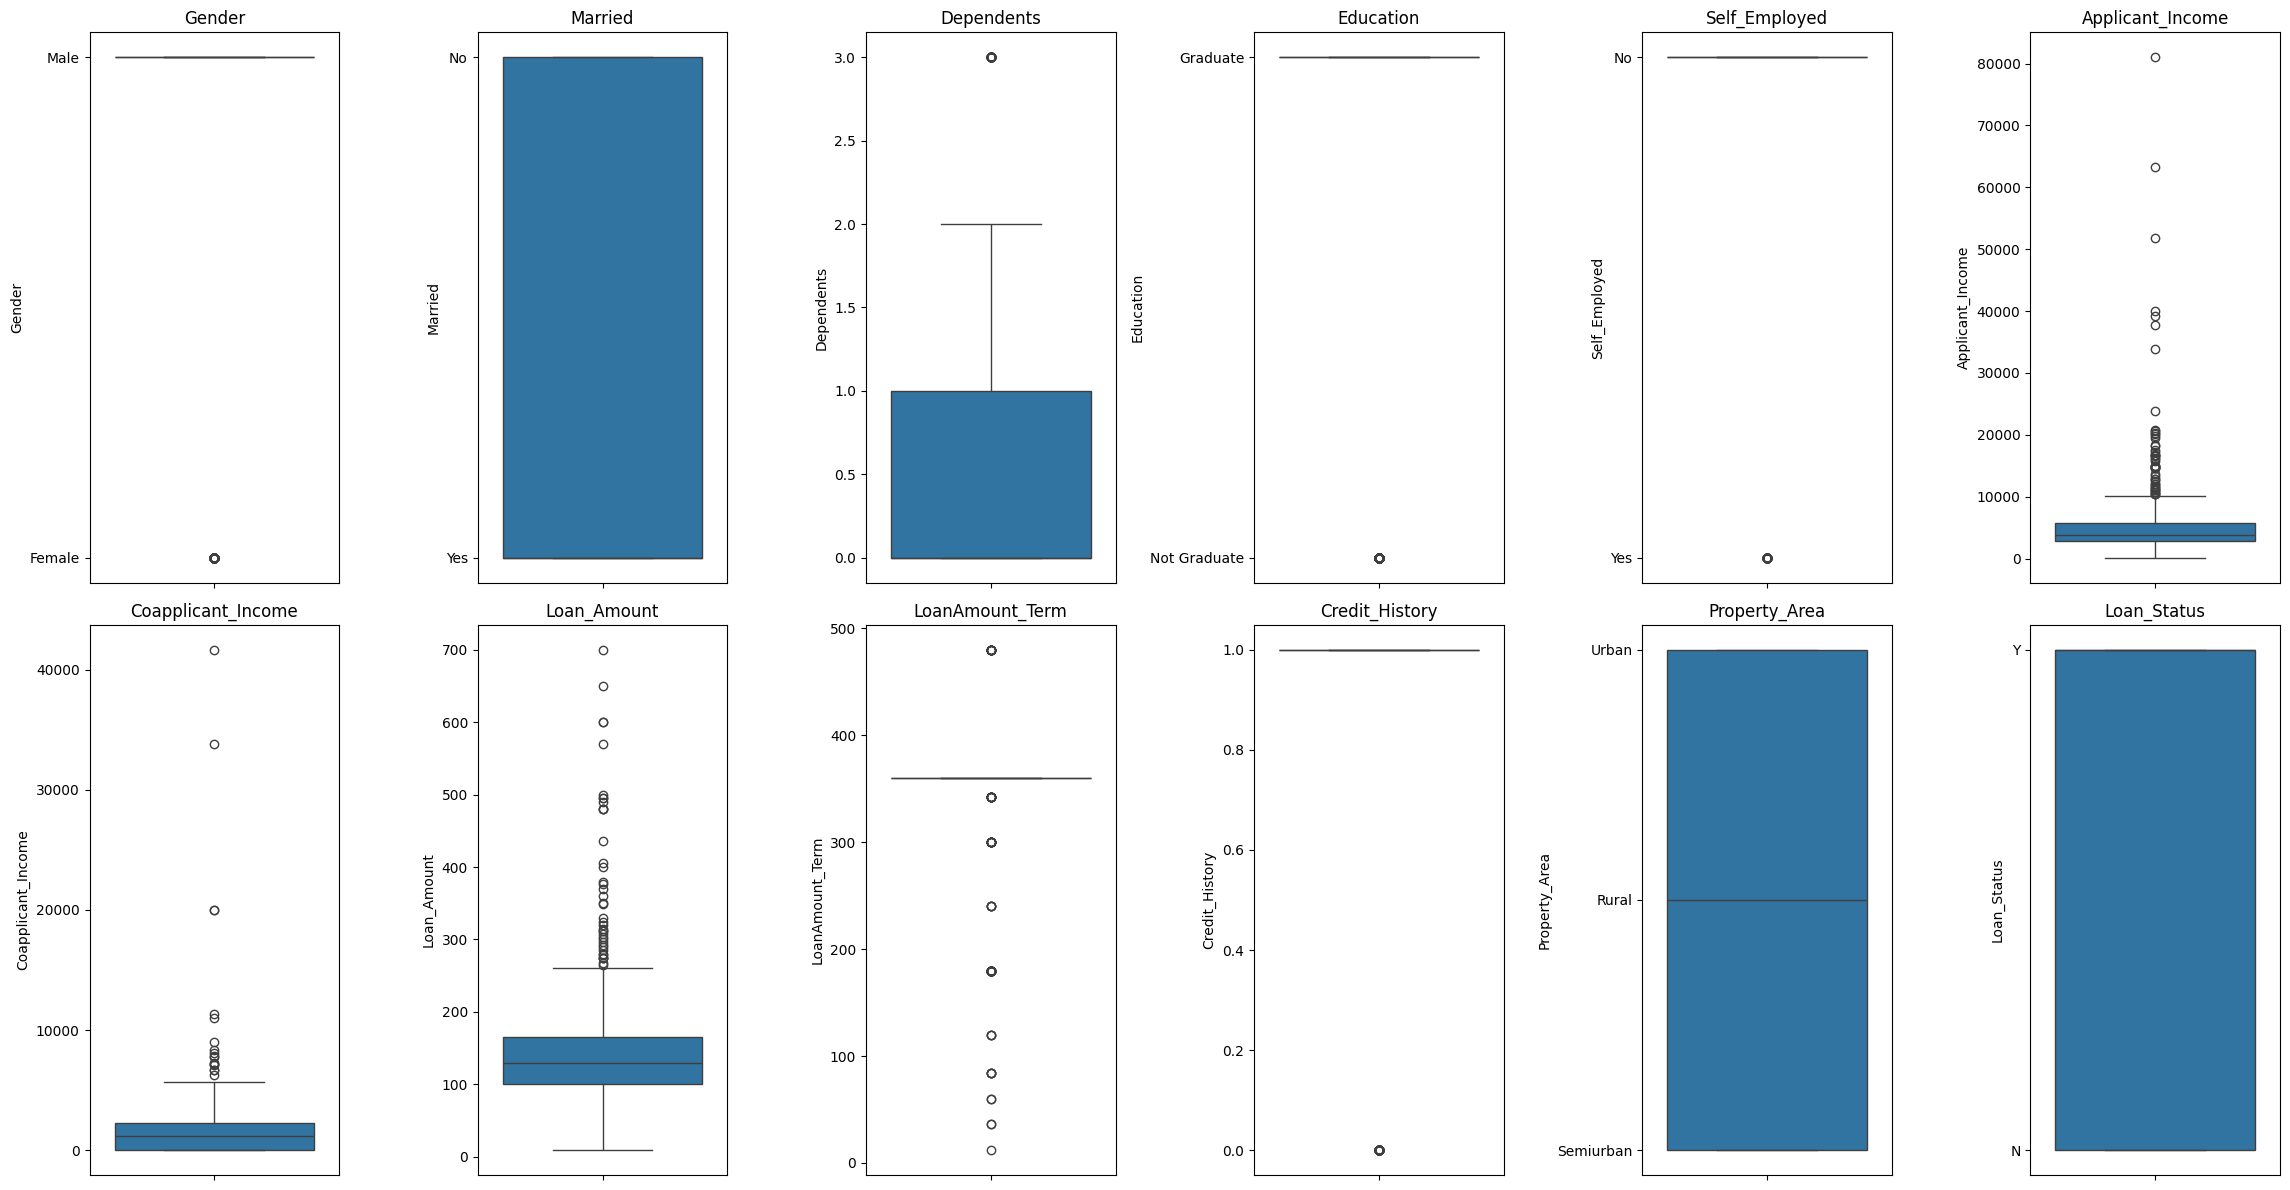

In [34]:
fig, ax = plt.subplots(ncols = 6, nrows = 2, figsize=[23,12])
ax= ax.flatten()
index=0

for col in data.columns:
    sns.boxplot(data[col], ax = ax[index])
    ax[index].set_title(col)
    index +=1

plt.tight_layout()

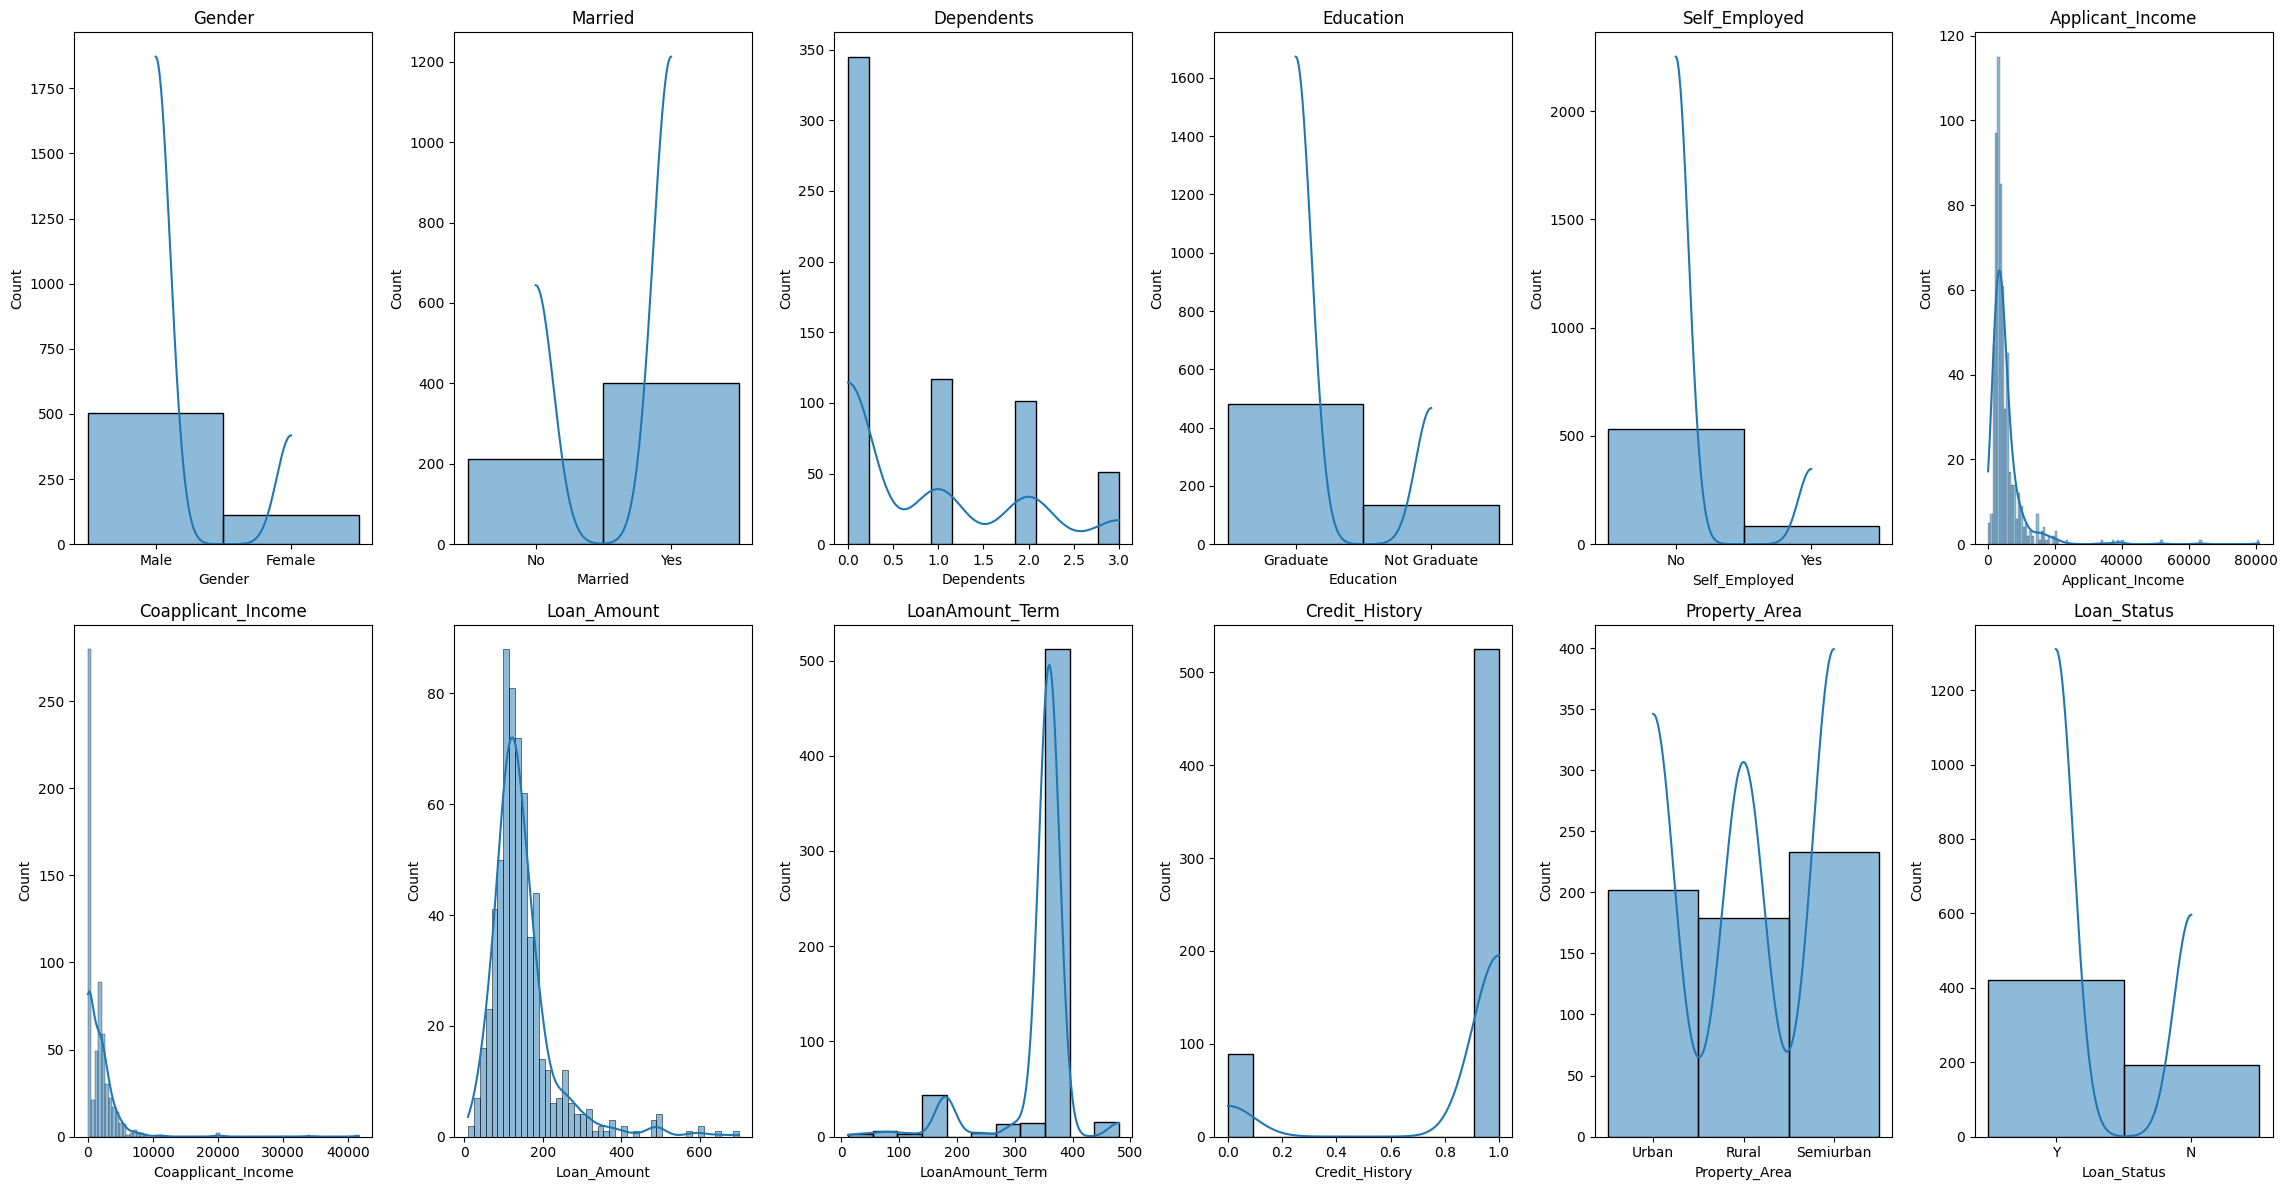

In [35]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=[23,12])
ax=ax.flatten()
index = 0

for col,value in data.items():
    sns.histplot(value, ax= ax[index], kde = True)
    ax[index].set_title(col)
    index+=1
    
plt.tight_layout()

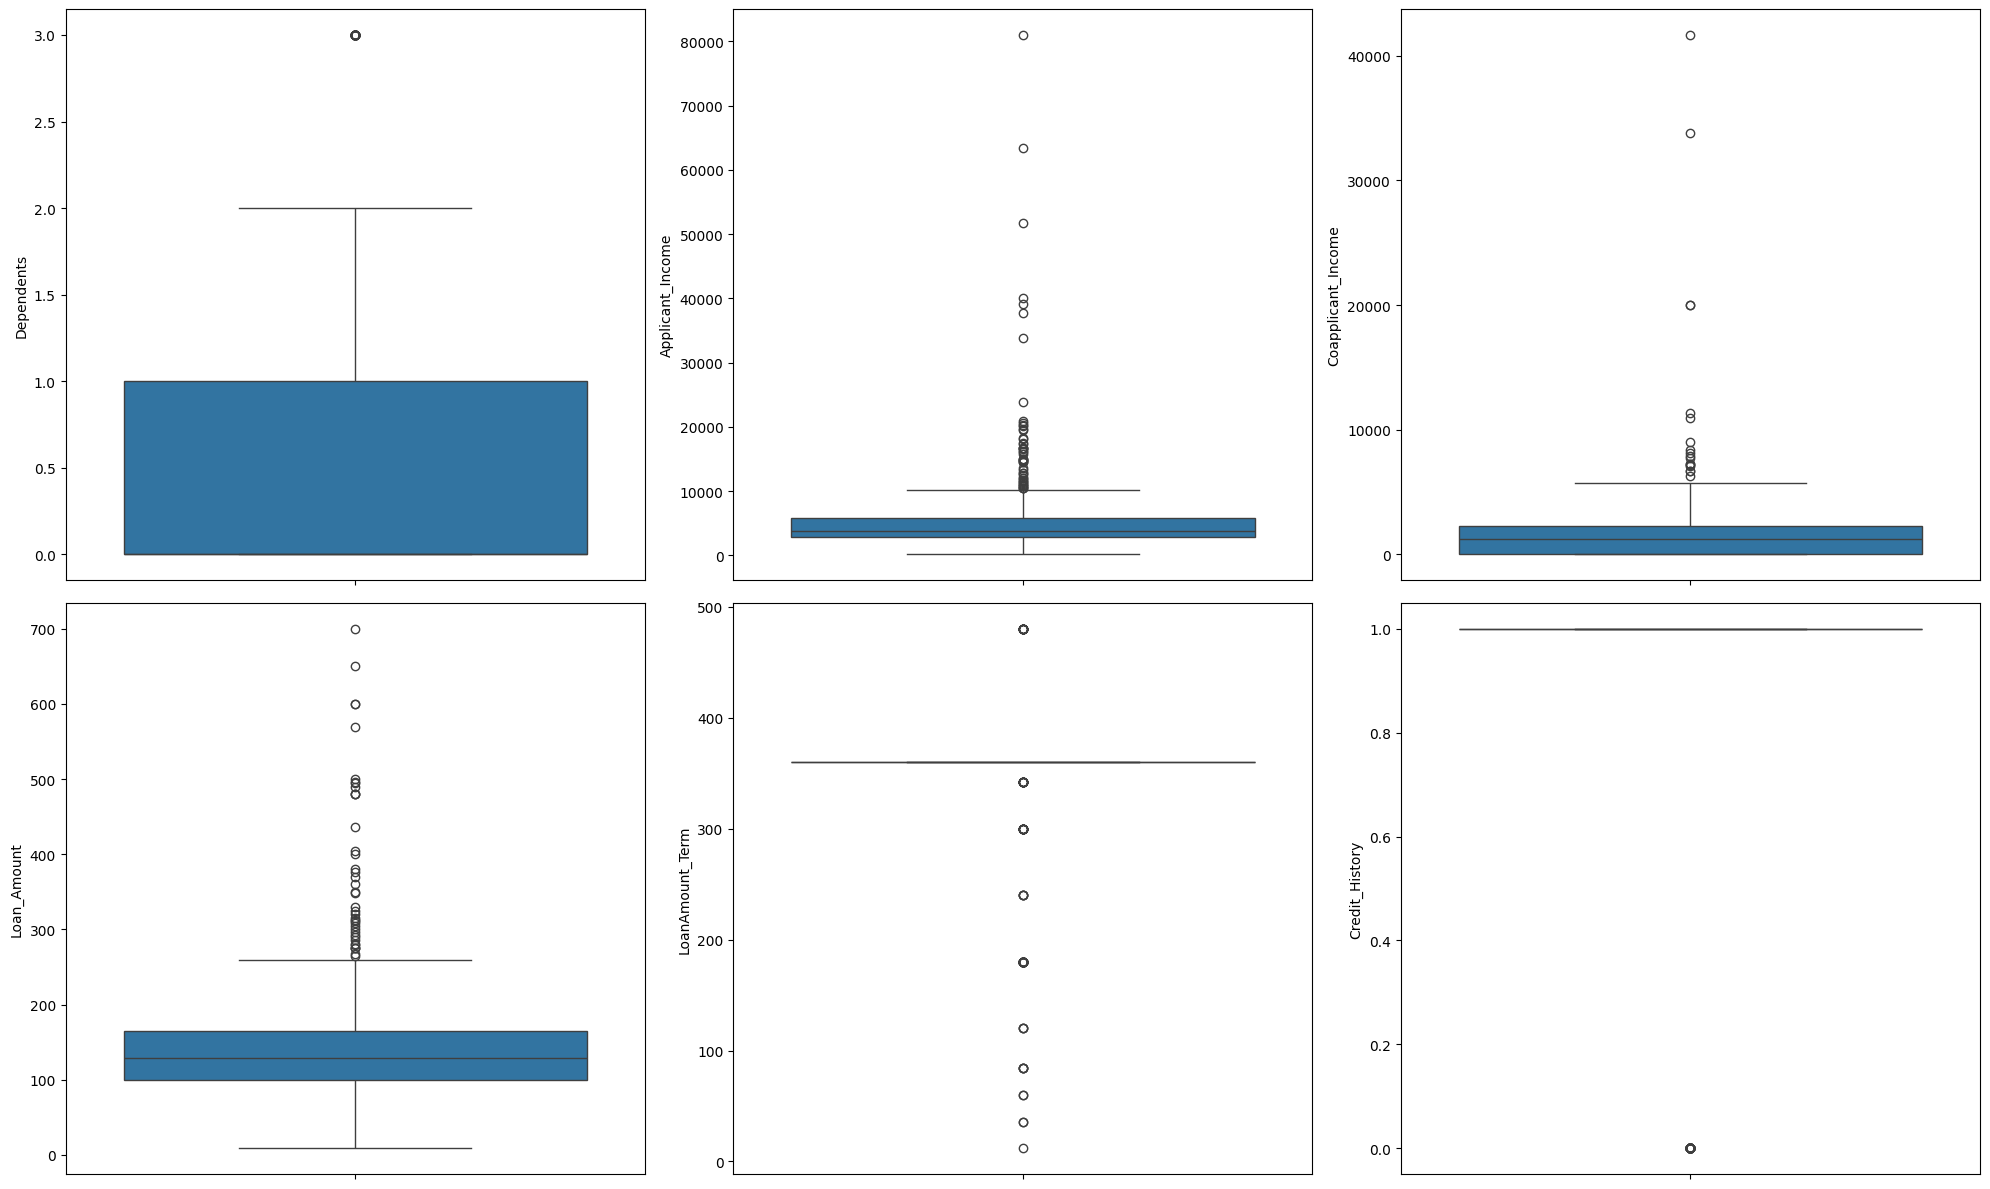

In [36]:
fig, ax = plt.subplots(ncols = 3, nrows = 2, figsize=[20,12])
ax= ax.flatten()
index=0
numeric_columns =(data.select_dtypes(include='number')).columns

for col in numeric_columns:
    sns.boxplot(data[col], ax = ax[index])
    index +=1

plt.tight_layout()

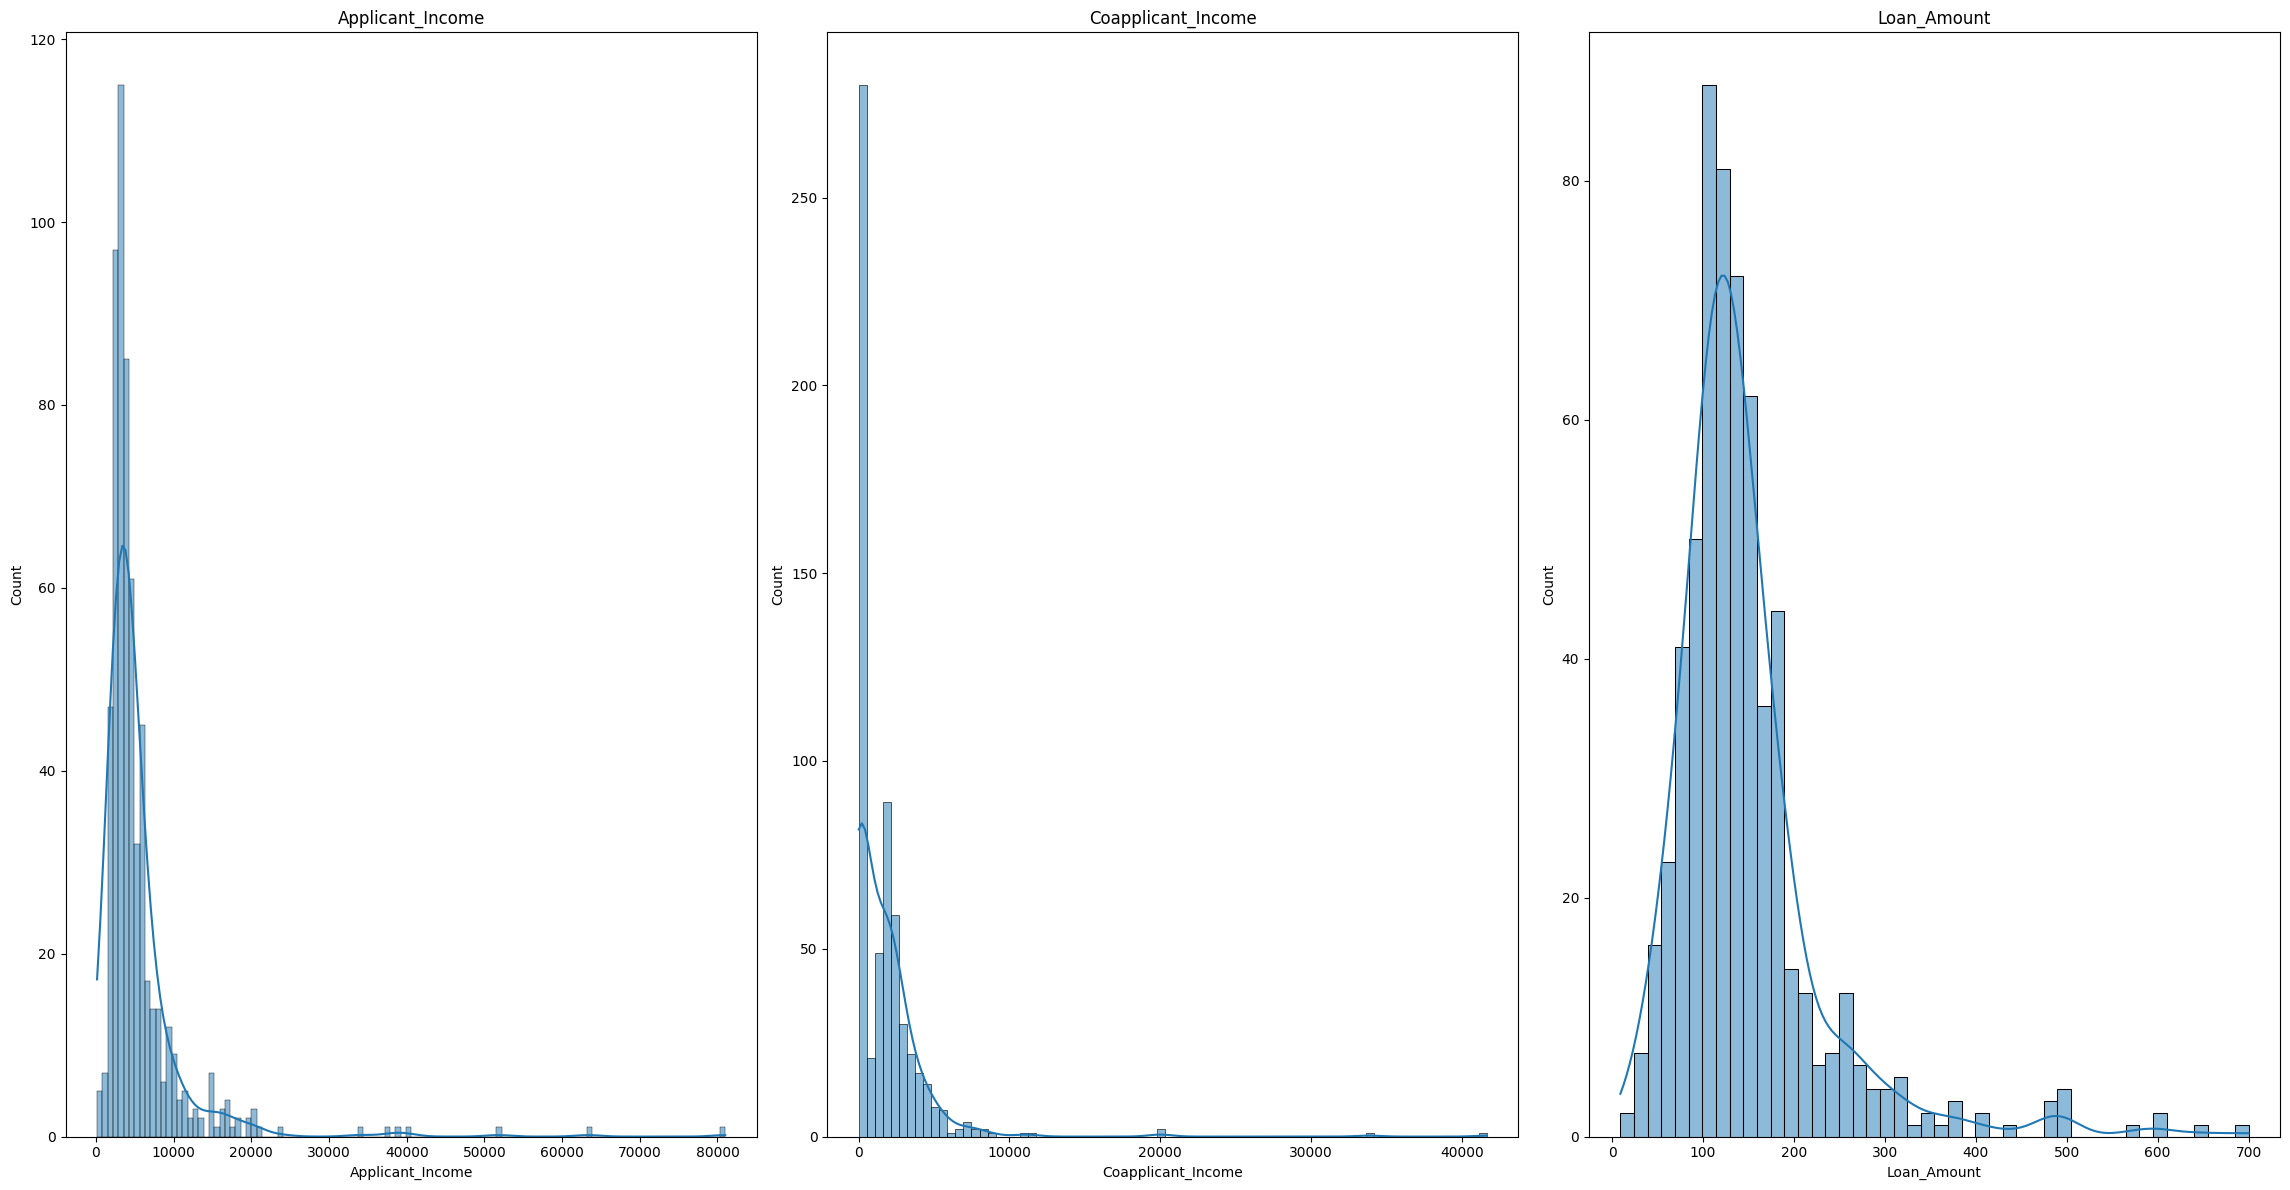

In [37]:
fig, ax = plt.subplots(ncols = 3, nrows=1, figsize = [23,12])
ax = ax.flatten()
index = 0
col_distplot = data[['Applicant_Income','Coapplicant_Income','Loan_Amount']]

for col,values in col_distplot.items():
    sns.histplot(values, ax=ax[index], kde=True)
    ax[index].set_title(col)
    index +=1

plt.tight_layout()

In [38]:
def IQR(data,columns):
    for col in columns:
        Q1 = np.percentile(data[col],25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[col]>lower_bound)&(data[col]<upper_bound)]
    return data

In [39]:
data.describe()

,Dependents,Applicant_Income,Coapplicant_Income,Loan_Amount,LoanAmount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.768730,5403.459283,1621.245798,146.412162,342.000000,0.855049
std,1.003387,6109.041673,2926.248369,84.037468,64.372489,0.352339
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [40]:
data_no_outlier = IQR(data,['Applicant_Income','Coapplicant_Income','Loan_Amount'])

In [41]:
data_no_outlier.describe()

,Dependents,Applicant_Income,Coapplicant_Income,Loan_Amount,LoanAmount_Term,Credit_History
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,0.732692,3995.719231,1317.578692,124.360083,342.092308,0.851923
std,0.983333,1794.687196,1397.402837,39.984816,65.554395,0.355518
min,0.000000,150.000000,0.000000,25.000000,12.000000,0.000000
25%,0.000000,2724.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3590.500000,1293.500000,123.000000,360.000000,1.000000
75%,1.000000,4772.750000,2191.000000,150.000000,360.000000,1.000000
max,3.000000,10047.000000,5701.000000,236.000000,480.000000,1.000000


In [42]:
data_no_outlier['LoanAmount_Term'].value_counts()

LoanAmount_Term
360.0    431
180.0     36
342.0     14
480.0     14
300.0     10
240.0      4
84.0       4
60.0       2
120.0      2
36.0       2
12.0       1
Name: count, dtype: int64

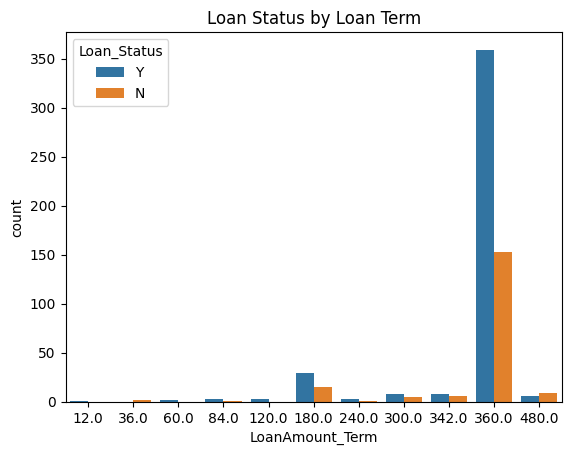

In [43]:
sns.countplot(x='LoanAmount_Term', hue='Loan_Status', data=data)
plt.title("Loan Status by Loan Term")
plt.show()

##### Let's convert this column to categorical and divivde the terms into 3 categoris -- short, medium and, long

In [44]:
data_no_outlier['LoanAmount_Term'].value_counts()

LoanAmount_Term
360.0    431
180.0     36
342.0     14
480.0     14
300.0     10
240.0      4
84.0       4
60.0       2
120.0      2
36.0       2
12.0       1
Name: count, dtype: int64

In [45]:
def convert_to_cat(term):
    if term >= 360:
        return 'Long'
    elif term >=180 and term < 360:
        return "Medium"
    else:
        return 'Short'
    
data_no_outlier['LoanAmount_Term_Categ']=data_no_outlier['LoanAmount_Term'].apply(convert_to_cat) 
        

In [46]:
data_no_outlier['LoanAmount_Term_Categ'].value_counts()

LoanAmount_Term_Categ
Long      445
Medium     64
Short      11
Name: count, dtype: int64

In [47]:
data_no_outlier.head(5)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,LoanAmount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_Term_Categ
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,Long
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,Long
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,Long
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,Long
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,Long


In [48]:
data_no_outlier.drop(columns='LoanAmount_Term',inplace=True)

In [49]:
data_no_outlier.head(5)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Credit_History,Property_Area,Loan_Status,LoanAmount_Term_Categ
0,Male,No,0,Graduate,No,5849,0.0,146.412162,1.0,Urban,Y,Long
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,1.0,Rural,N,Long
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,1.0,Urban,Y,Long
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,1.0,Urban,Y,Long
4,Male,No,0,Graduate,No,6000,0.0,141.000000,1.0,Urban,Y,Long


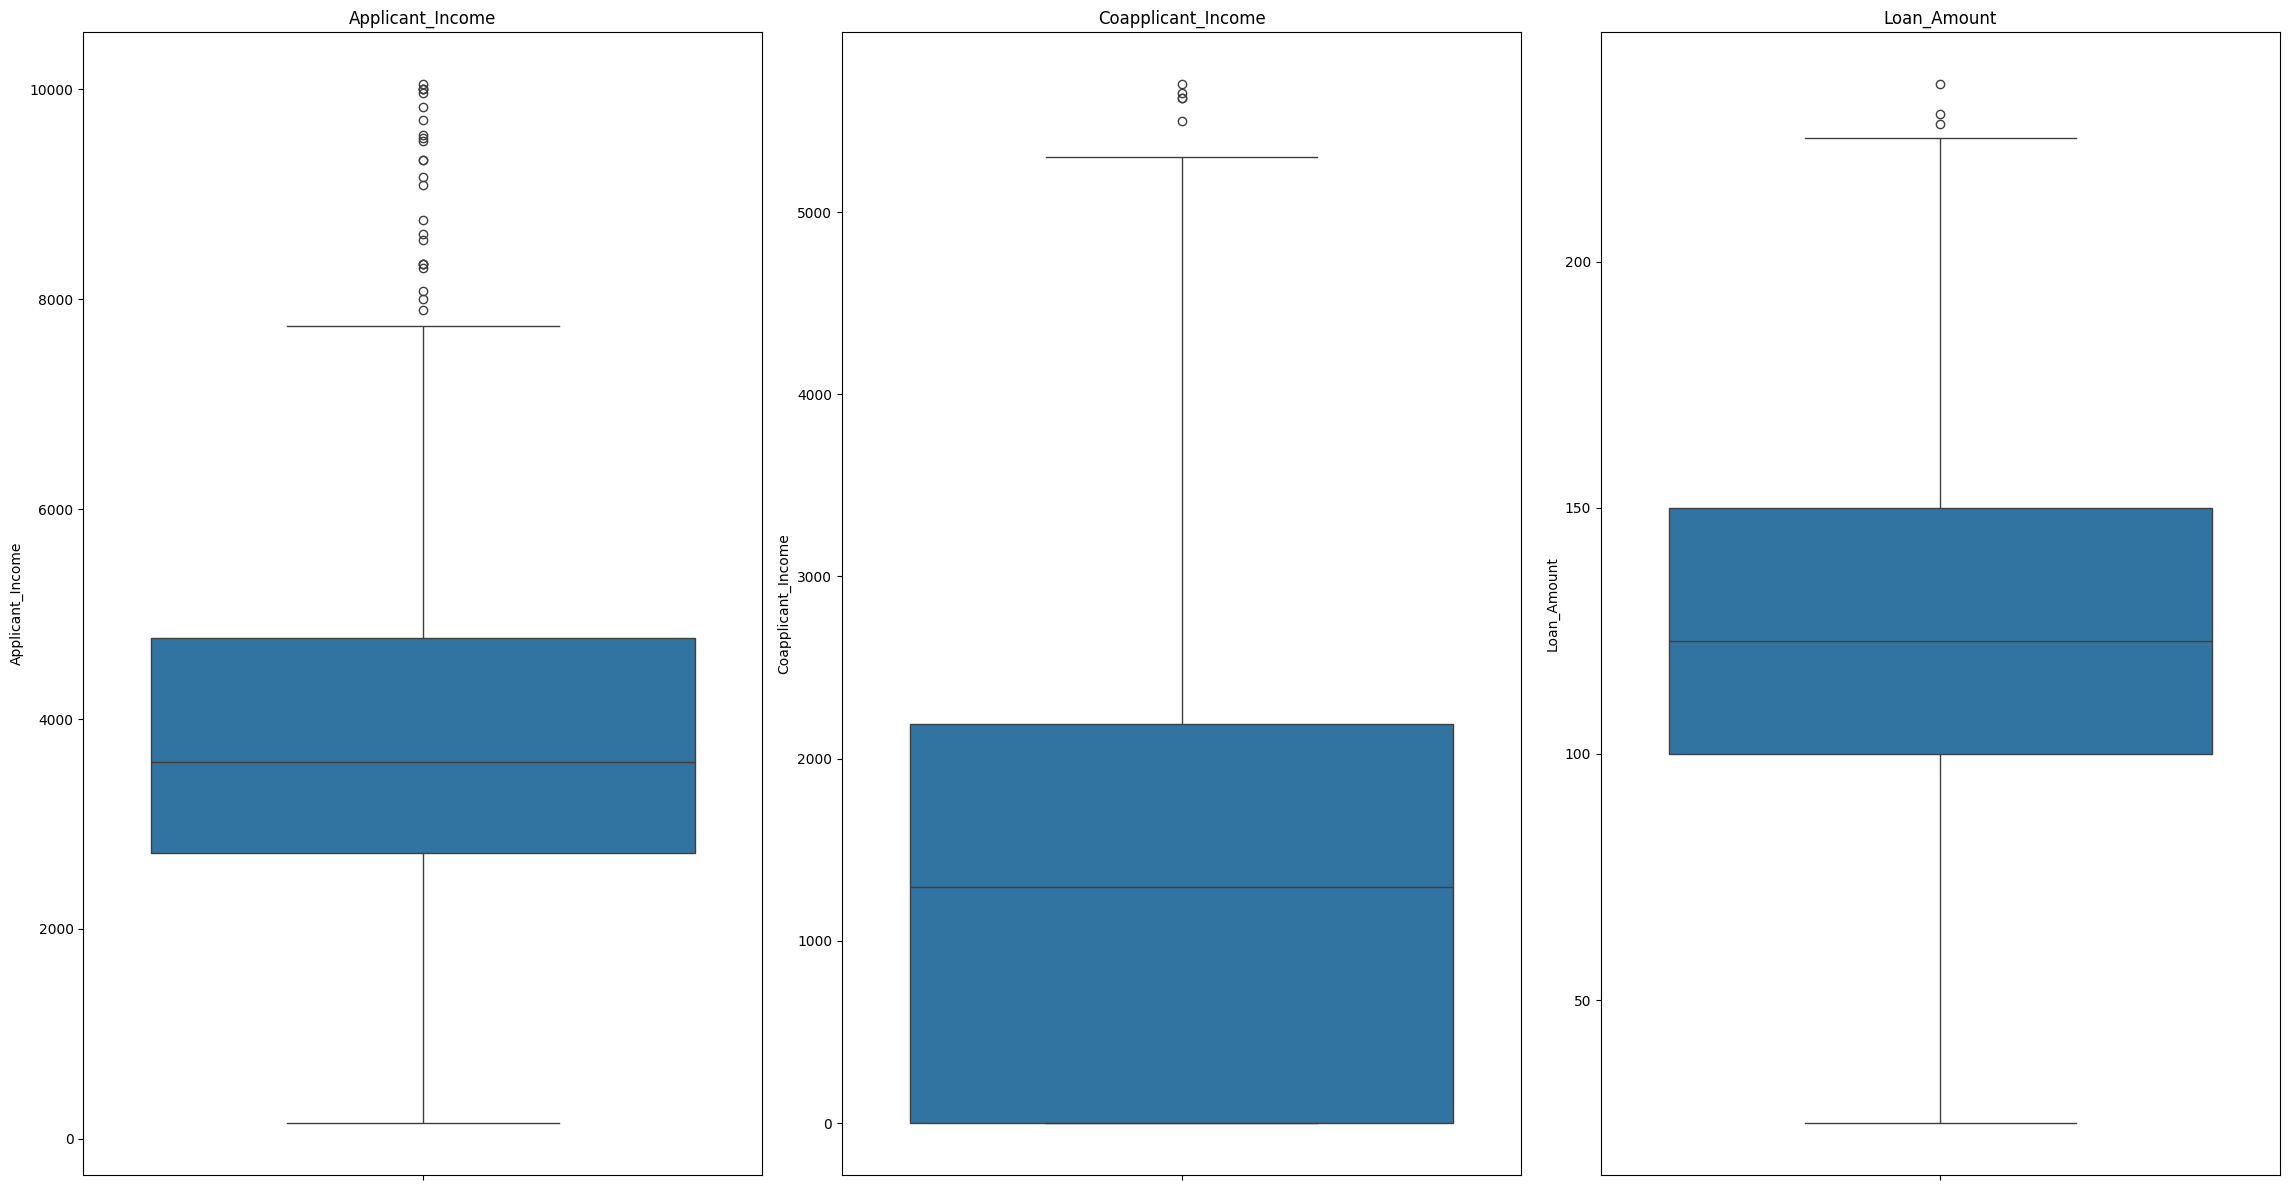

In [50]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=[23,12])
ax=ax.flatten()
index=0
outlier_col = data[['Applicant_Income','Coapplicant_Income','Loan_Amount']]

for col in outlier_col.columns:
    sns.boxplot(data_no_outlier[col], ax=ax[index])
    ax[index].set_title(col)
    index+=1

plt.tight_layout()

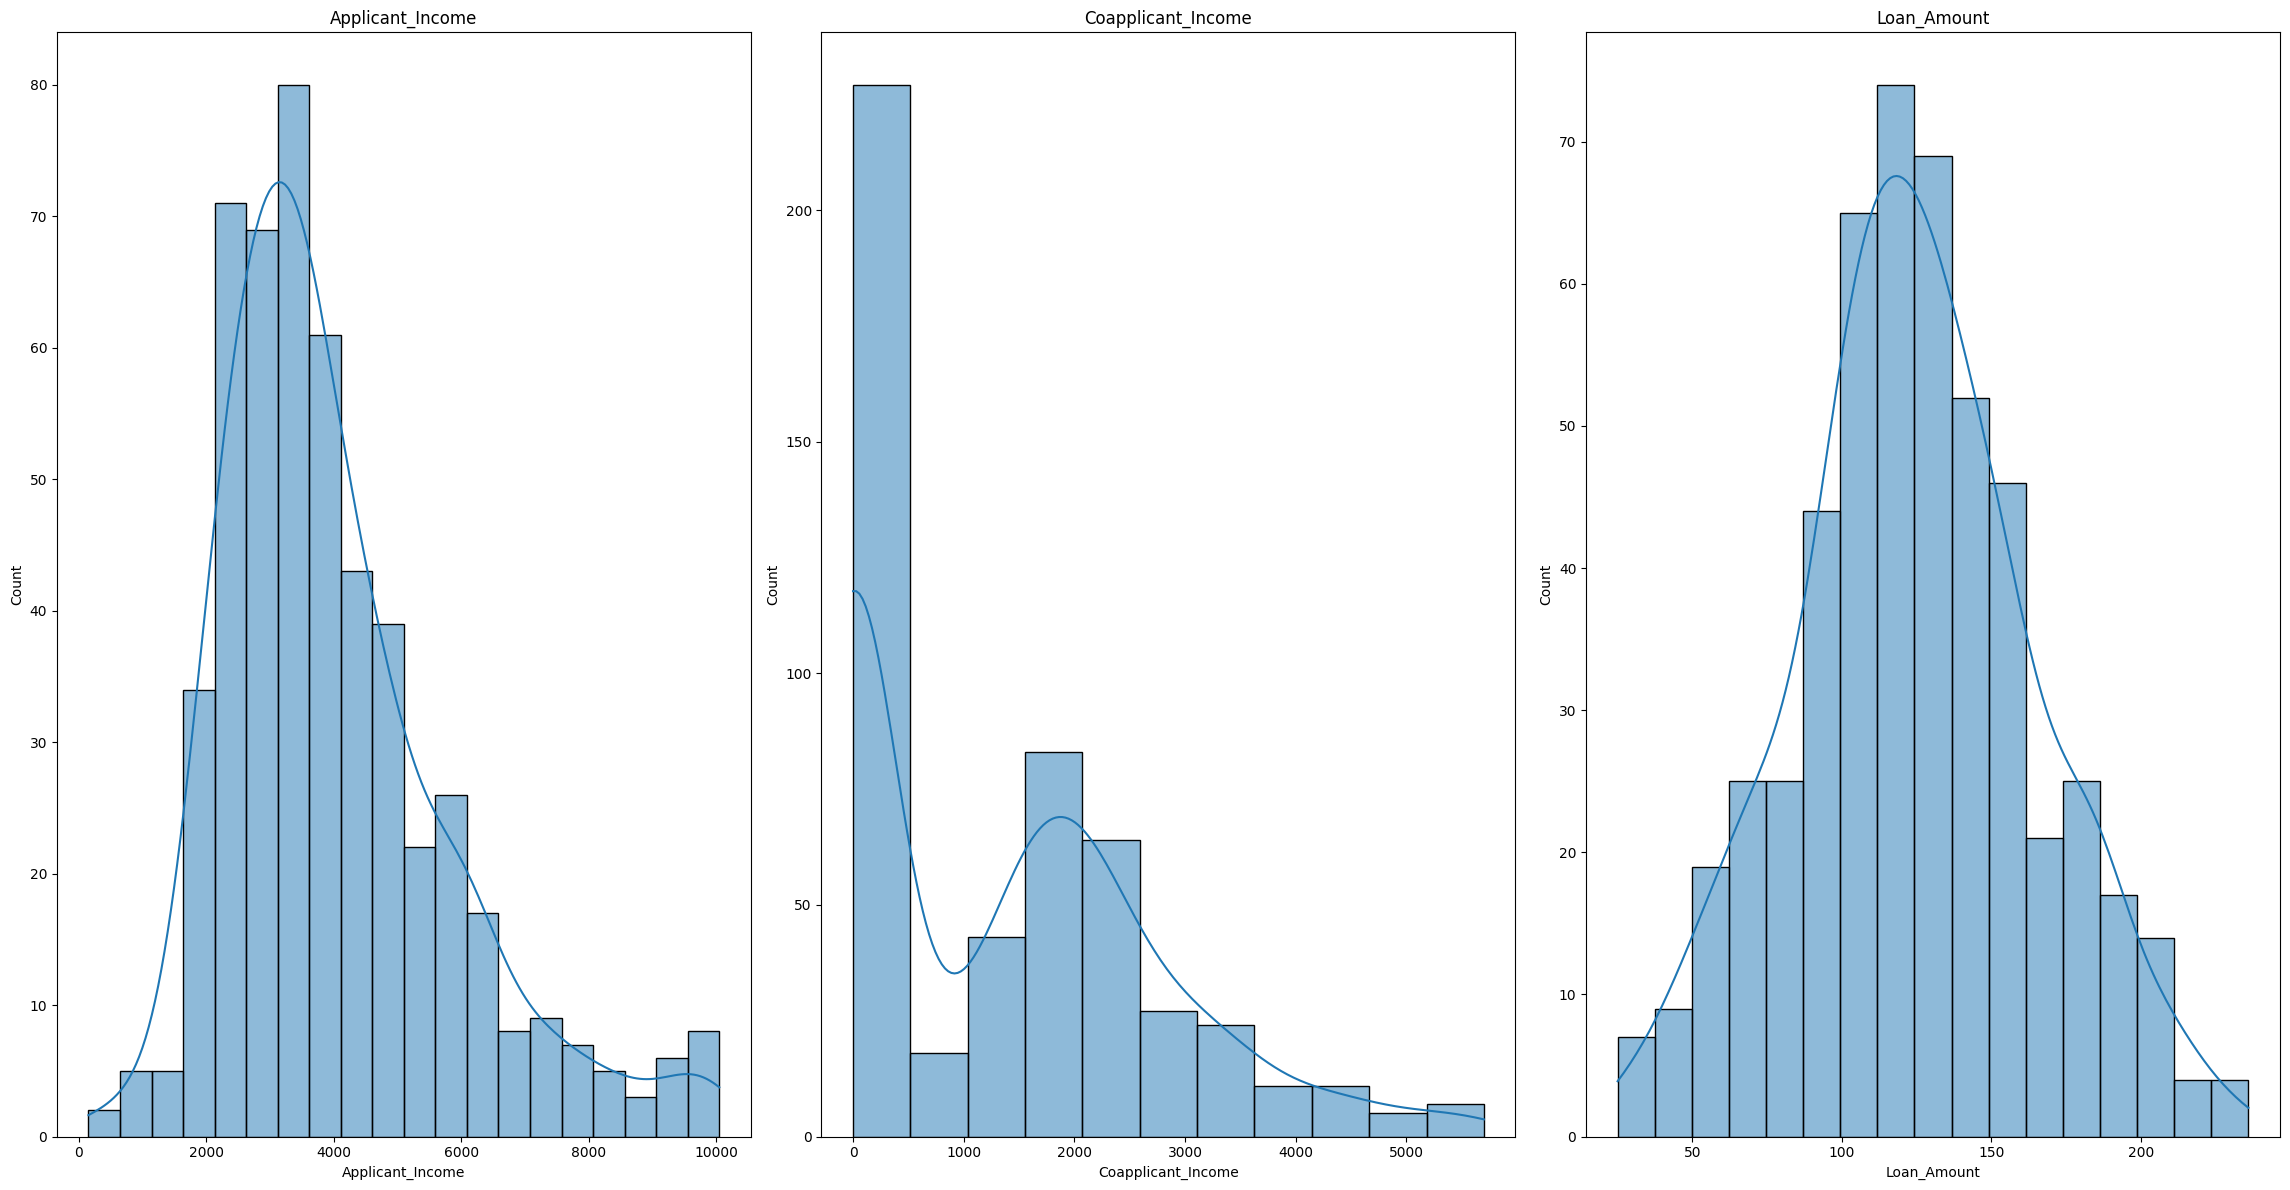

In [51]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=[23,12])
ax=ax.flatten()
index=0

col_displot_noOutlier = data_no_outlier[['Applicant_Income','Coapplicant_Income','Loan_Amount']]

for col,value in col_displot_noOutlier.items():
    sns.histplot(value, ax=ax[index], kde=True)
    ax[index].set_title(col)
    index+=1

plt.tight_layout()

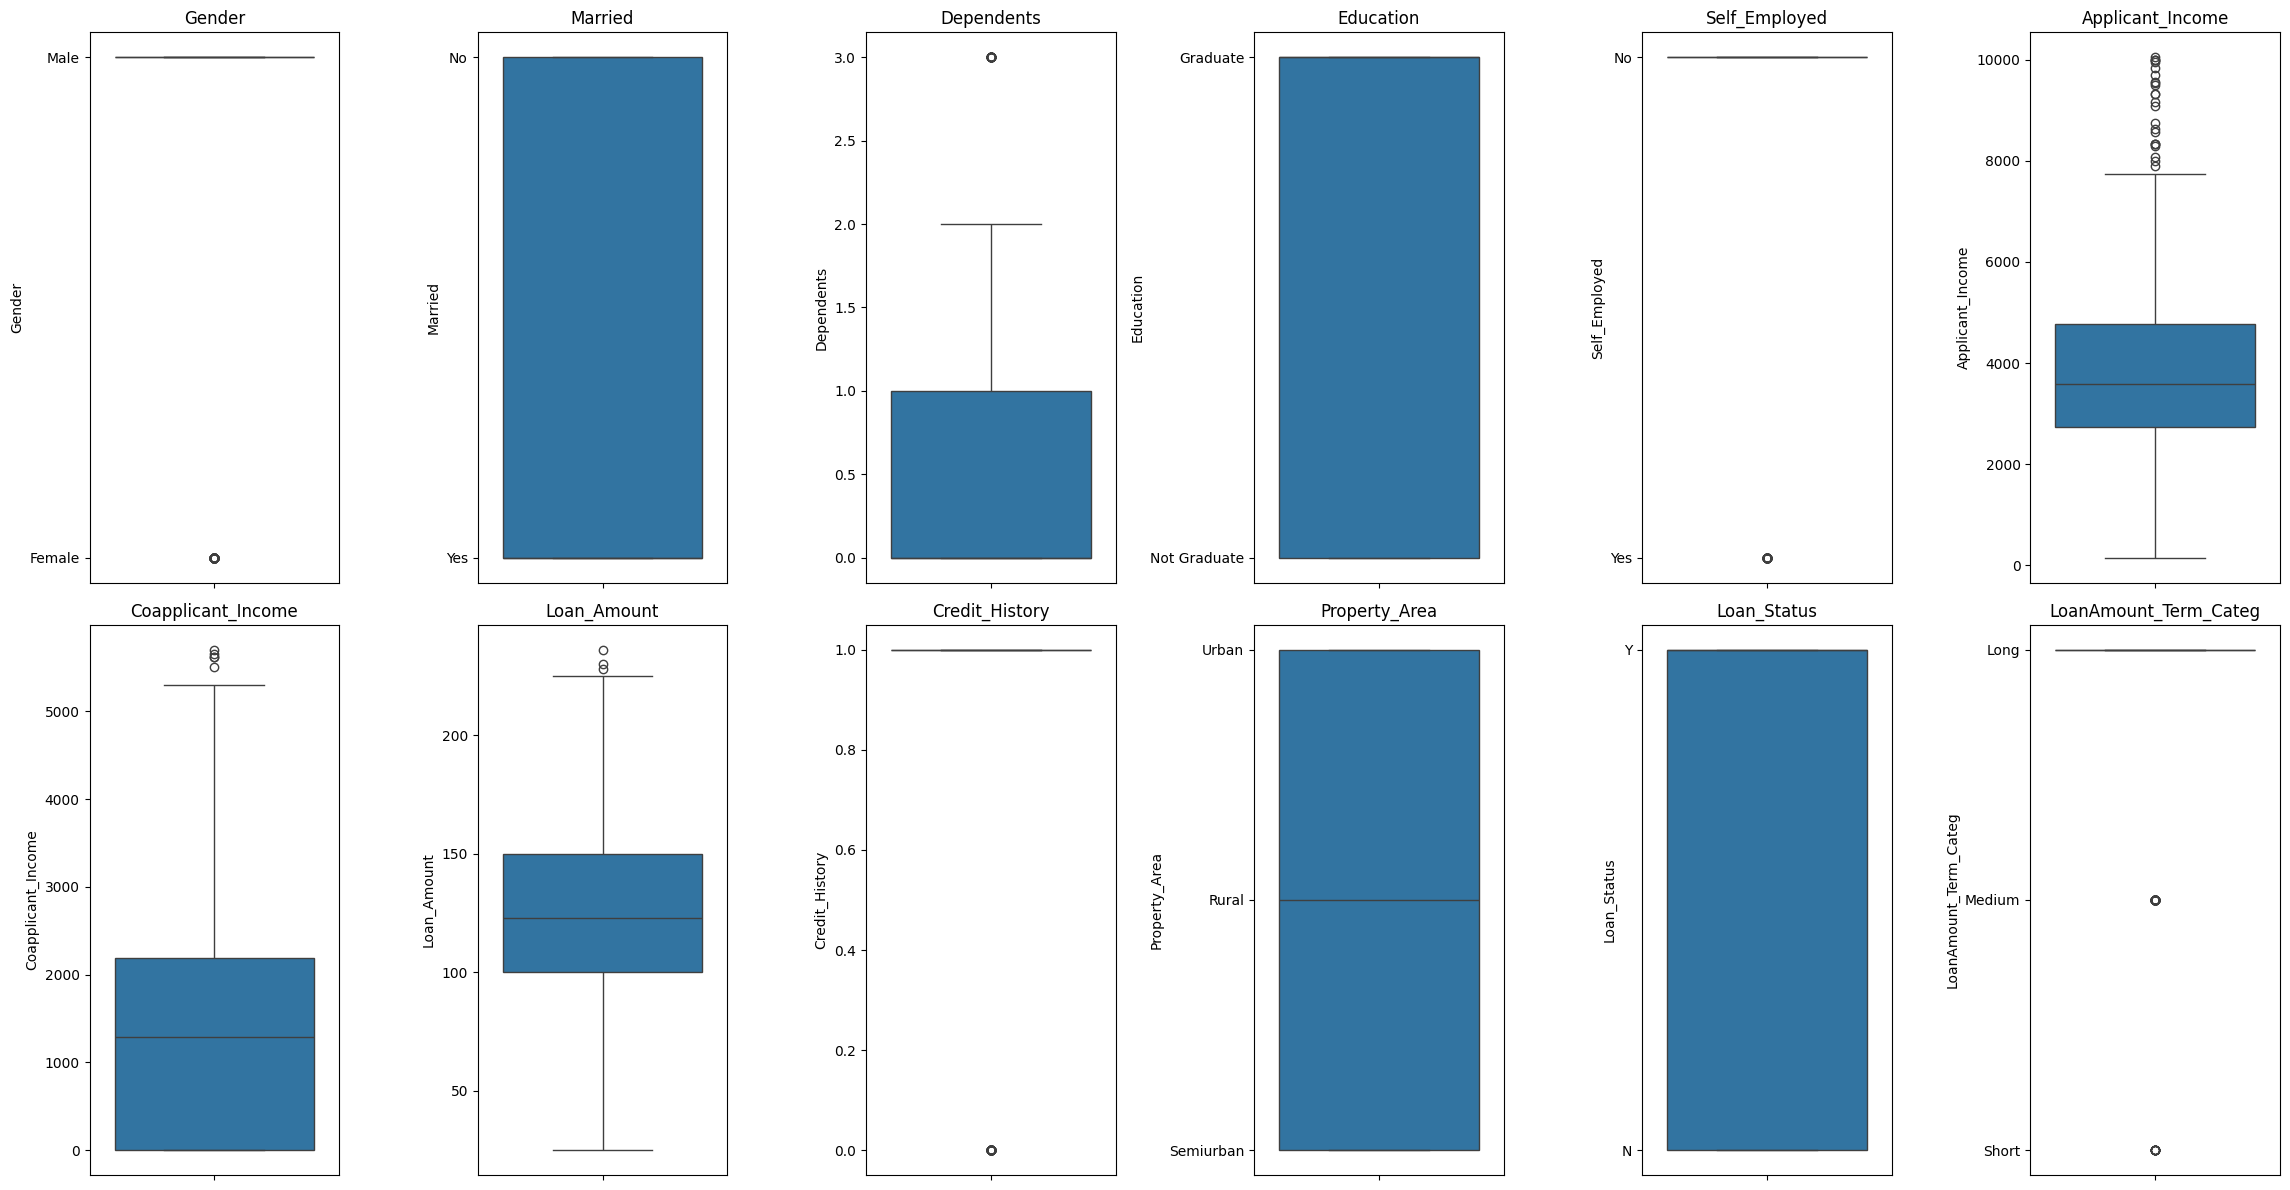

In [52]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=[23,12])
ax=ax.flatten()
index=0

for col in data_no_outlier.columns:
    sns.boxplot(data_no_outlier[col], ax=ax[index])
    ax[index].set_title(col)
    index+=1

plt.tight_layout()

<Axes: xlabel='Coapplicant_Income'>

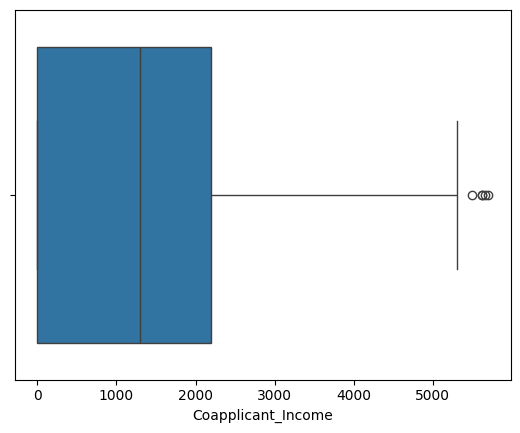

In [53]:
sns.boxplot(x='Coapplicant_Income', data = data_no_outlier)

In [54]:
(IQR(data_no_outlier,['Coapplicant_Income']))['Coapplicant_Income']

0         0.0
1      1508.0
2         0.0
3      2358.0
4         0.0
        ...  
608    1950.0
609       0.0
610       0.0
612       0.0
613       0.0
Name: Coapplicant_Income, Length: 515, dtype: float64

<Axes: xlabel='Coapplicant_Income'>

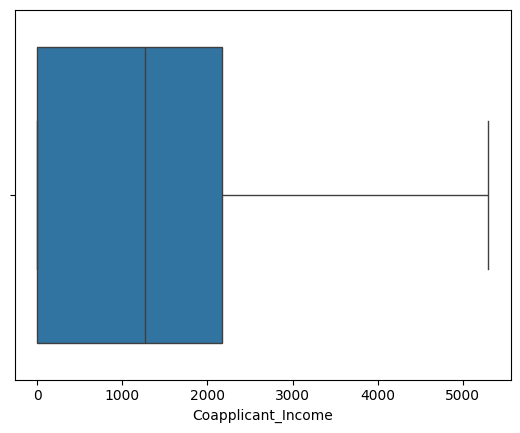

In [55]:
sns.boxplot(x='Coapplicant_Income',data=(IQR(data_no_outlier,['Coapplicant_Income'])))

In [56]:
data_no_outlier['Coapplicant_Income'].info()

<class 'pandas.core.series.Series'>
Index: 520 entries, 0 to 613
Series name: Coapplicant_Income
Non-Null Count  Dtype  
--------------  -----  
520 non-null    float64
dtypes: float64(1)
memory usage: 8.1 KB


In [57]:
IQR(data_no_outlier,['Coapplicant_Income']).info()

<class 'pandas.core.frame.DataFrame'>
Index: 515 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 515 non-null    object 
 1   Married                515 non-null    object 
 2   Dependents             515 non-null    int64  
 3   Education              515 non-null    object 
 4   Self_Employed          515 non-null    object 
 5   Applicant_Income       515 non-null    int64  
 6   Coapplicant_Income     515 non-null    float64
 7   Loan_Amount            515 non-null    float64
 8   Credit_History         515 non-null    float64
 9   Property_Area          515 non-null    object 
 10  Loan_Status            515 non-null    object 
 11  LoanAmount_Term_Categ  515 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 52.3+ KB


### So, We can drop more outliers in the Coapplicant Columns as these are only 5 entries

In [58]:
data_no_outlier=IQR(data_no_outlier,['Coapplicant_Income'])

In [59]:
data_no_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 515 non-null    object 
 1   Married                515 non-null    object 
 2   Dependents             515 non-null    int64  
 3   Education              515 non-null    object 
 4   Self_Employed          515 non-null    object 
 5   Applicant_Income       515 non-null    int64  
 6   Coapplicant_Income     515 non-null    float64
 7   Loan_Amount            515 non-null    float64
 8   Credit_History         515 non-null    float64
 9   Property_Area          515 non-null    object 
 10  Loan_Status            515 non-null    object 
 11  LoanAmount_Term_Categ  515 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 52.3+ KB


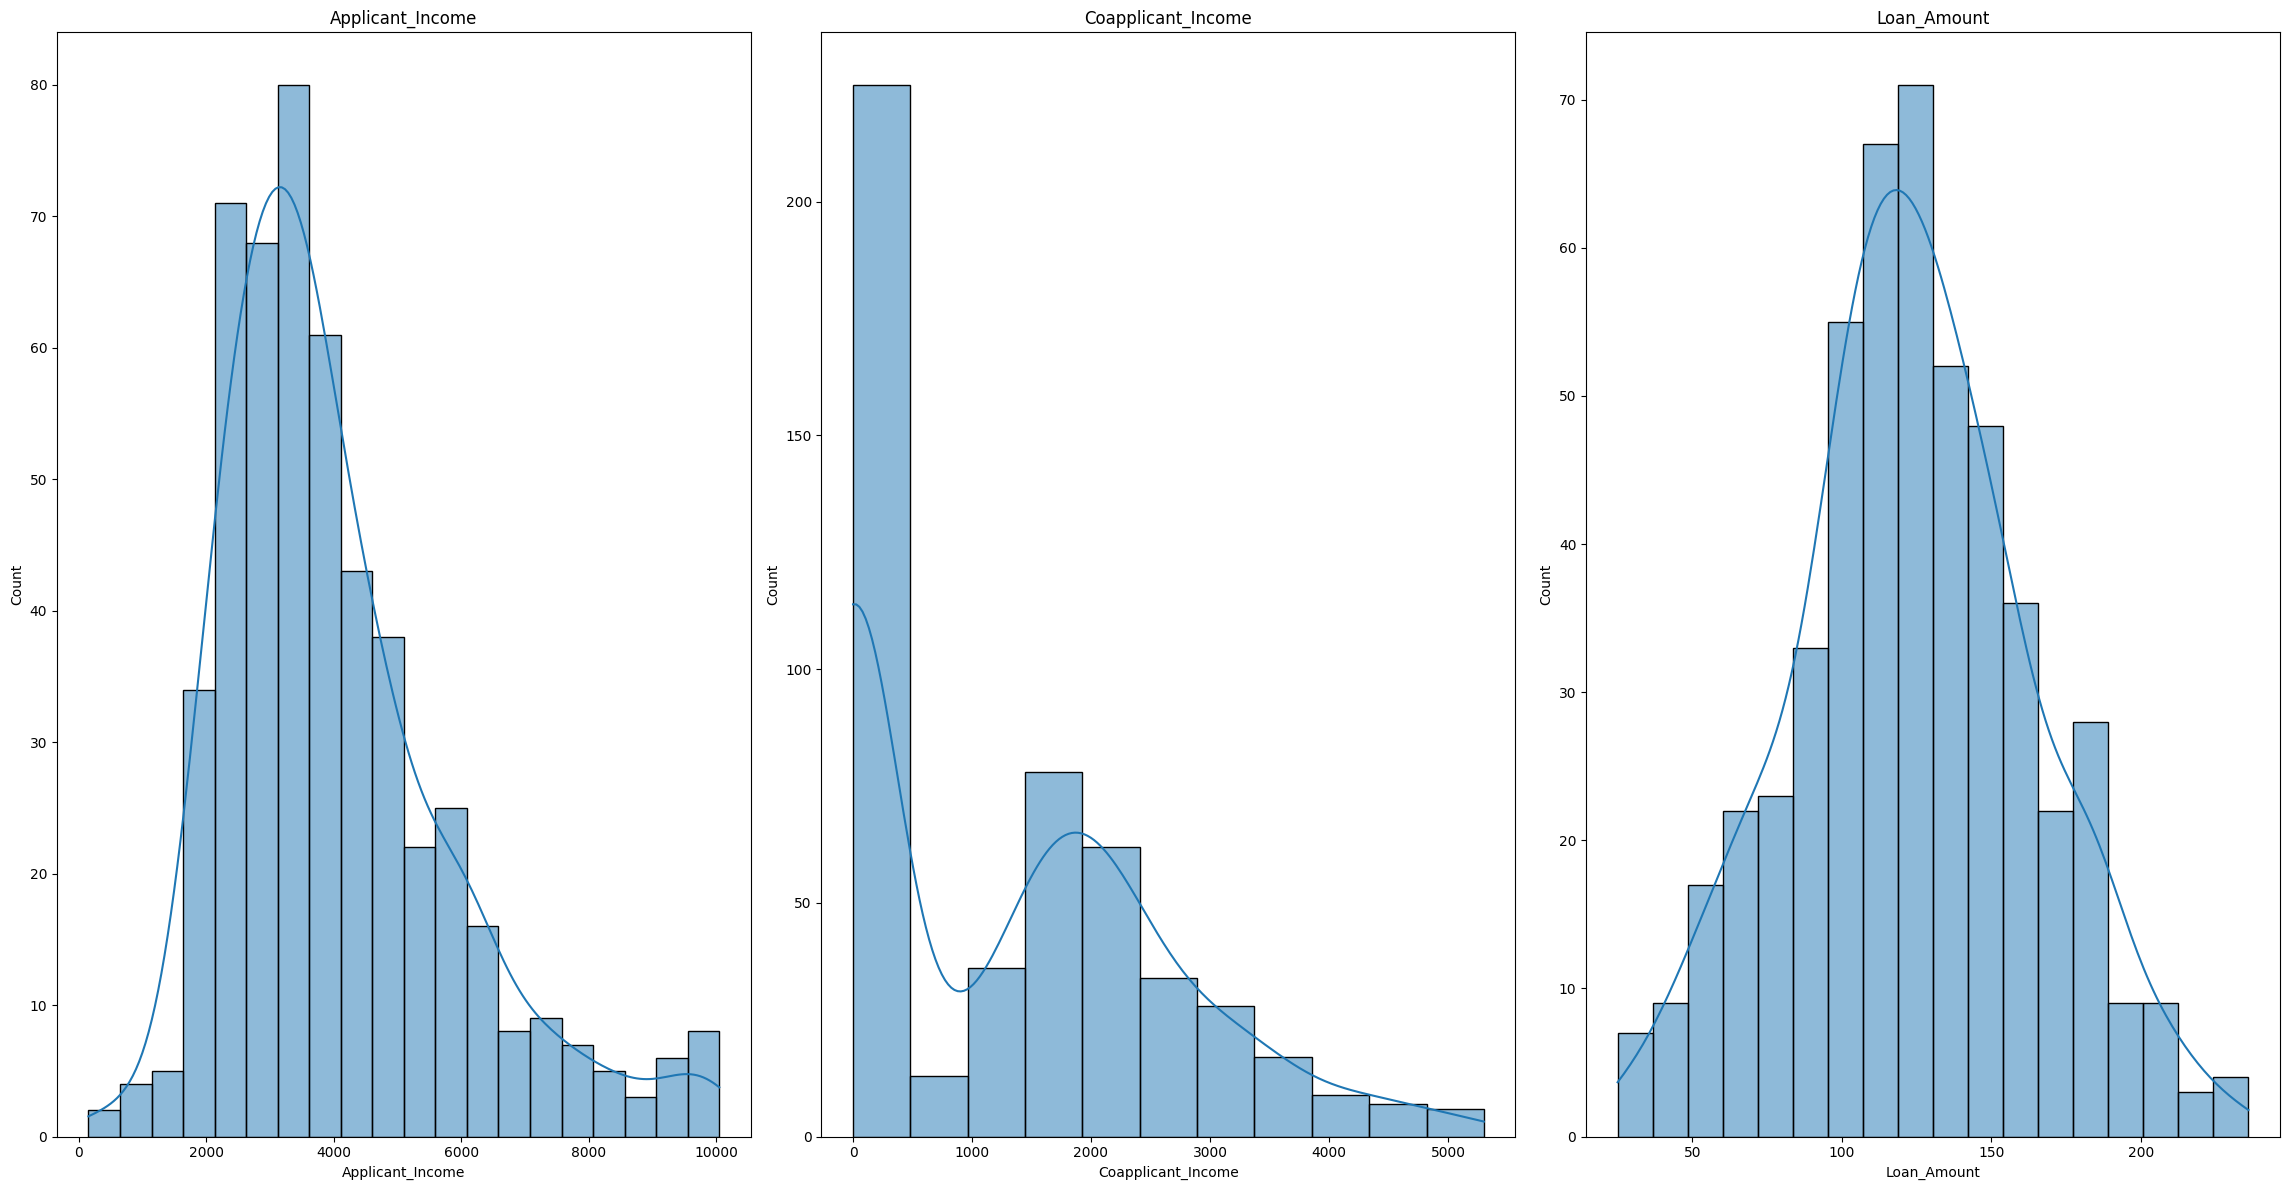

In [60]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=[23,12])
ax=ax.flatten()
index=0

col_displot_noOutlier = data_no_outlier[['Applicant_Income','Coapplicant_Income','Loan_Amount']]

for col,value in col_displot_noOutlier.items():
    sns.histplot(value, ax=ax[index], kde=True)
    ax[index].set_title(col)
    index+=1

plt.tight_layout()

In [61]:
data_no_outlier.describe()

,Dependents,Applicant_Income,Coapplicant_Income,Loan_Amount,Credit_History
count,515.000000,515.000000,515.000000,515.000000,515.000000
mean,0.732039,3994.099029,1275.799845,123.715035,0.850485
std,0.983345,1793.302479,1337.835861,39.580713,0.356942
min,0.000000,150.000000,0.000000,25.000000,0.000000
25%,0.000000,2723.000000,0.000000,99.500000,1.000000
50%,0.000000,3588.000000,1260.000000,122.000000,1.000000
75%,1.000000,4752.500000,2166.500000,147.206081,1.000000
max,3.000000,10047.000000,5302.000000,236.000000,1.000000


<Axes: ylabel='Applicant_Income'>

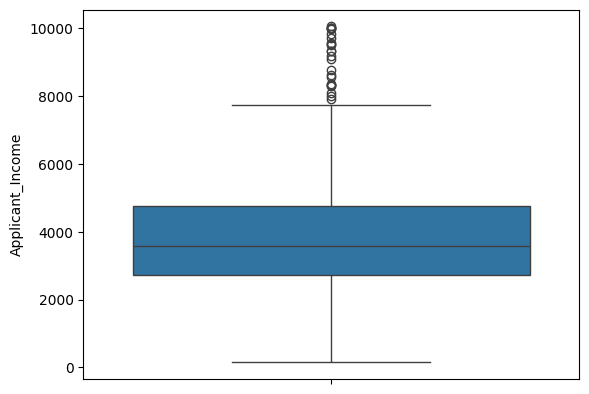

In [62]:
sns.boxplot(data_no_outlier['Applicant_Income'])

In [63]:
data_no_outlier['Applicant_Income'].info()

<class 'pandas.core.series.Series'>
Index: 515 entries, 0 to 613
Series name: Applicant_Income
Non-Null Count  Dtype
--------------  -----
515 non-null    int64
dtypes: int64(1)
memory usage: 8.0 KB


In [64]:
IQR(data_no_outlier,['Applicant_Income']).info()

<class 'pandas.core.frame.DataFrame'>
Index: 491 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 491 non-null    object 
 1   Married                491 non-null    object 
 2   Dependents             491 non-null    int64  
 3   Education              491 non-null    object 
 4   Self_Employed          491 non-null    object 
 5   Applicant_Income       491 non-null    int64  
 6   Coapplicant_Income     491 non-null    float64
 7   Loan_Amount            491 non-null    float64
 8   Credit_History         491 non-null    float64
 9   Property_Area          491 non-null    object 
 10  Loan_Status            491 non-null    object 
 11  LoanAmount_Term_Categ  491 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 49.9+ KB


### Around 25 entries would be deleted to remove the outliers in the Applicant Income Column. Let's do this

In [65]:
data_no_outlier=IQR(data_no_outlier,['Applicant_Income'])

In [66]:
data_no_outlier.describe()

,Dependents,Applicant_Income,Coapplicant_Income,Loan_Amount,Credit_History
count,491.000000,491.000000,491.000000,491.000000,491.000000
mean,0.729124,3744.780041,1298.456049,121.270532,0.845214
std,0.984547,1418.317684,1330.012169,38.169275,0.362070
min,0.000000,150.000000,0.000000,25.000000,0.000000
25%,0.000000,2688.500000,0.000000,98.000000,1.000000
50%,0.000000,3497.000000,1302.000000,120.000000,1.000000
75%,1.000000,4603.000000,2167.500000,146.412162,1.000000
max,3.000000,7740.000000,5302.000000,236.000000,1.000000


In [67]:
data_no_outlier[data_no_outlier['Coapplicant_Income'] >4000].info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 76 to 603
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 19 non-null     object 
 1   Married                19 non-null     object 
 2   Dependents             19 non-null     int64  
 3   Education              19 non-null     object 
 4   Self_Employed          19 non-null     object 
 5   Applicant_Income       19 non-null     int64  
 6   Coapplicant_Income     19 non-null     float64
 7   Loan_Amount            19 non-null     float64
 8   Credit_History         19 non-null     float64
 9   Property_Area          19 non-null     object 
 10  Loan_Status            19 non-null     object 
 11  LoanAmount_Term_Categ  19 non-null     object 
dtypes: float64(3), int64(2), object(7)
memory usage: 1.9+ KB


### 19 more entries to be removed to remove outlier impact

In [68]:
data_no_outlier = data_no_outlier[data_no_outlier['Coapplicant_Income'] <= 4000]

In [69]:
data_no_outlier.describe()

,Dependents,Applicant_Income,Coapplicant_Income,Loan_Amount,Credit_History
count,472.000000,472.000000,472.000000,472.000000,472.000000
mean,0.741525,3741.375000,1166.198983,120.372523,0.845339
std,0.990899,1411.974655,1175.372734,37.921445,0.361965
min,0.000000,150.000000,0.000000,25.000000,0.000000
25%,0.000000,2698.750000,0.000000,97.750000,1.000000
50%,0.000000,3466.000000,1221.000000,120.000000,1.000000
75%,1.000000,4587.250000,2083.000000,146.103041,1.000000
max,3.000000,7740.000000,4000.000000,236.000000,1.000000


In [70]:
data_no_outlier

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Credit_History,Property_Area,Loan_Status,LoanAmount_Term_Categ
0,Male,No,0,Graduate,No,5849,0.0,146.412162,1.0,Urban,Y,Long
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,1.0,Rural,N,Long
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,1.0,Urban,Y,Long
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,1.0,Urban,Y,Long
4,Male,No,0,Graduate,No,6000,0.0,141.000000,1.0,Urban,Y,Long
...,...,...,...,...,...,...,...,...,...,...,...,...
608,Male,Yes,0,Graduate,No,3232,1950.0,108.000000,1.0,Rural,Y,Long
609,Female,No,0,Graduate,No,2900,0.0,71.000000,1.0,Rural,Y,Long
610,Male,Yes,3,Graduate,No,4106,0.0,40.000000,1.0,Rural,Y,Medium
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,1.0,Urban,Y,Long


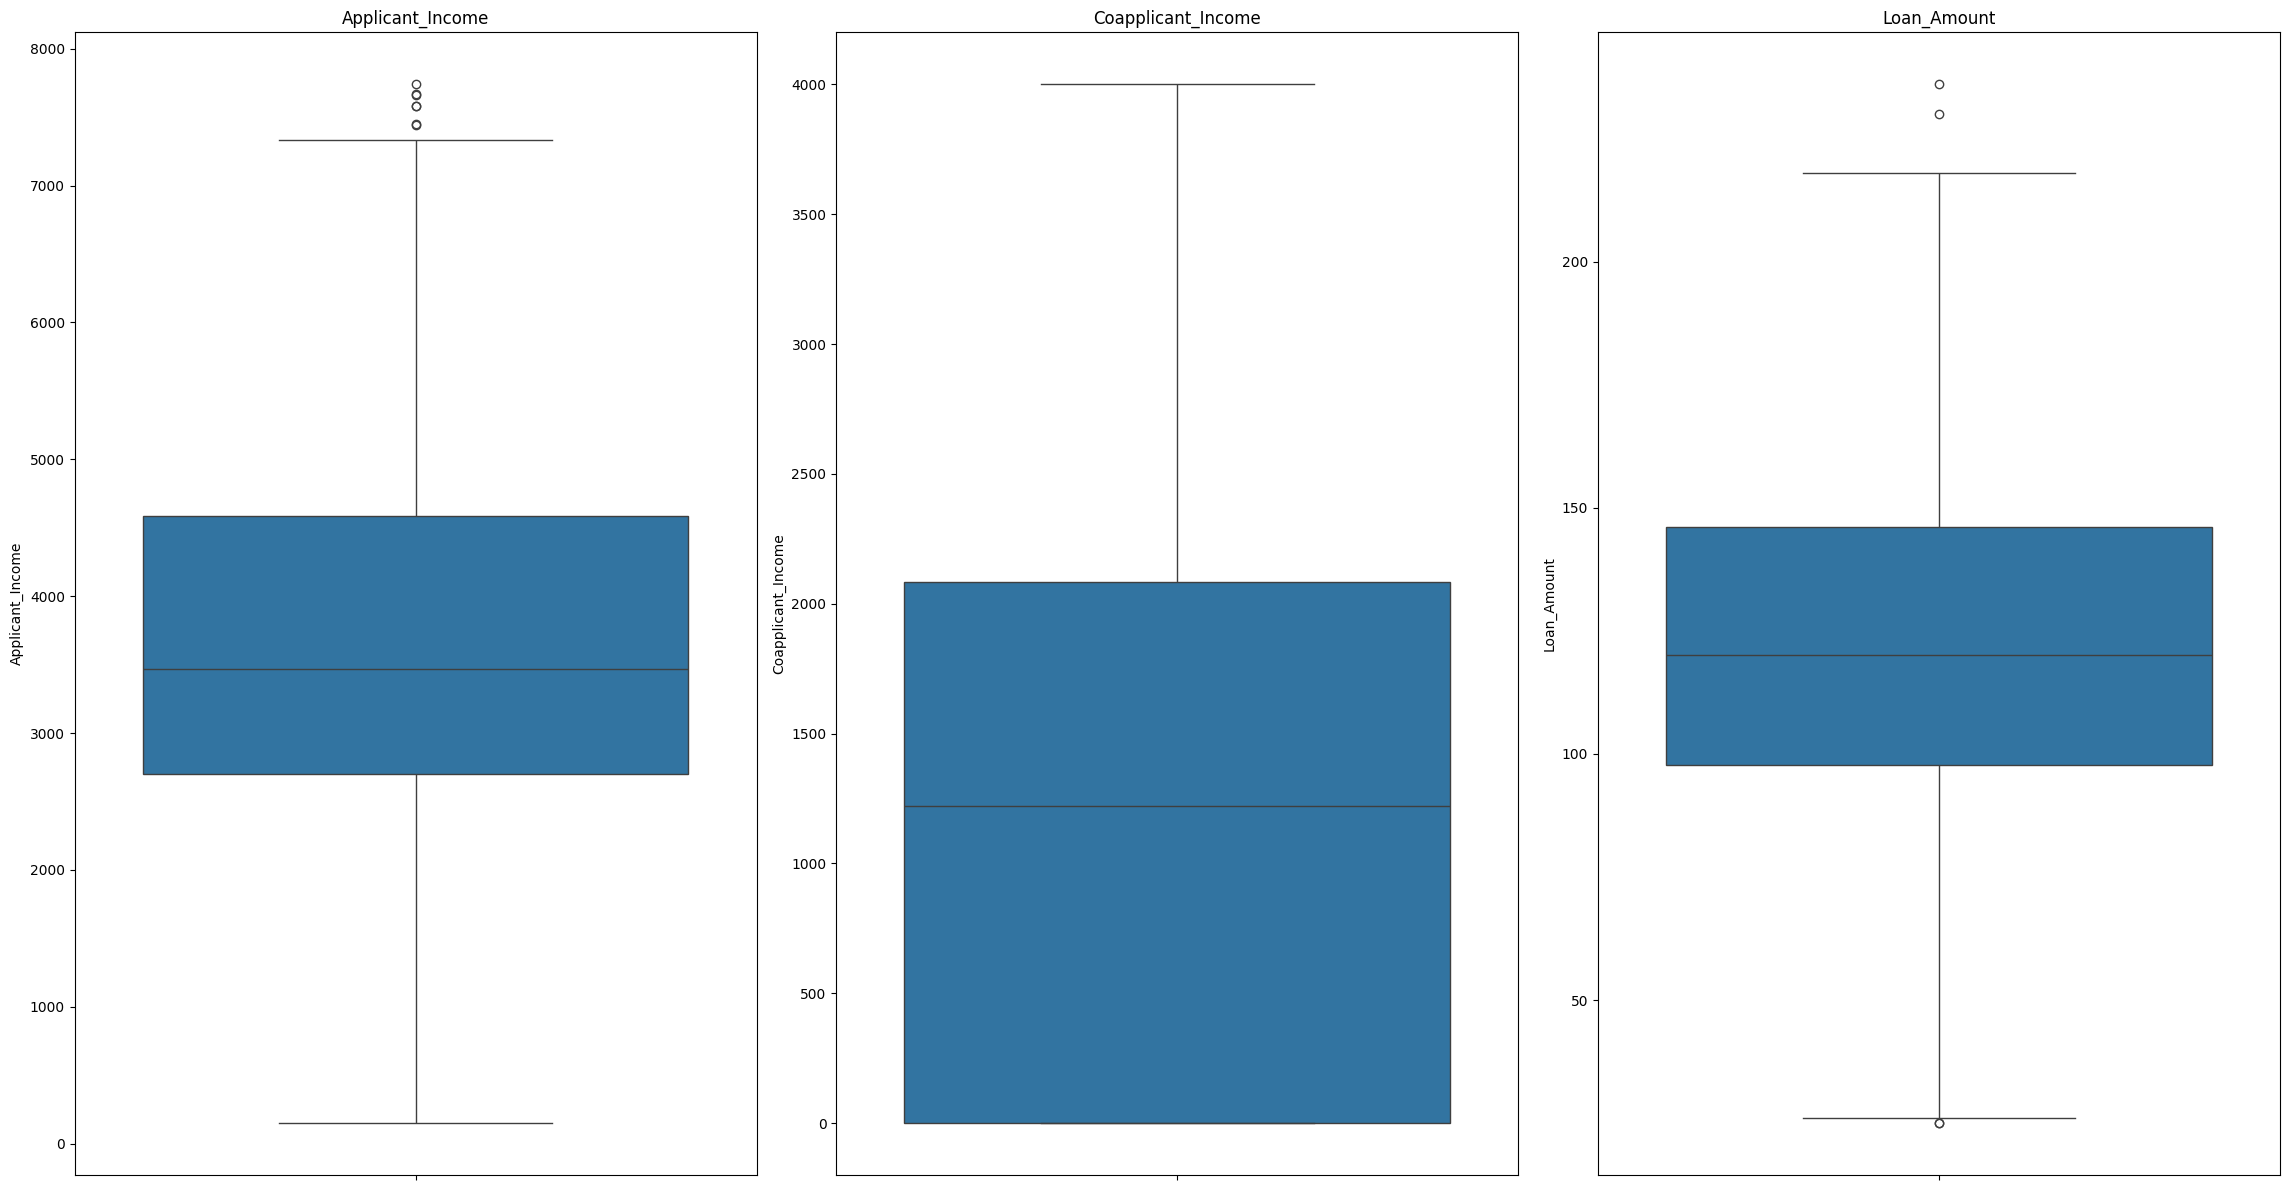

In [71]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=[23,12])
ax=ax.flatten()
index=0
outlier_col = data[['Applicant_Income','Coapplicant_Income','Loan_Amount']]

for col in outlier_col.columns:
    sns.boxplot(data_no_outlier[col], ax=ax[index])
    ax[index].set_title(col)
    index+=1

plt.tight_layout()

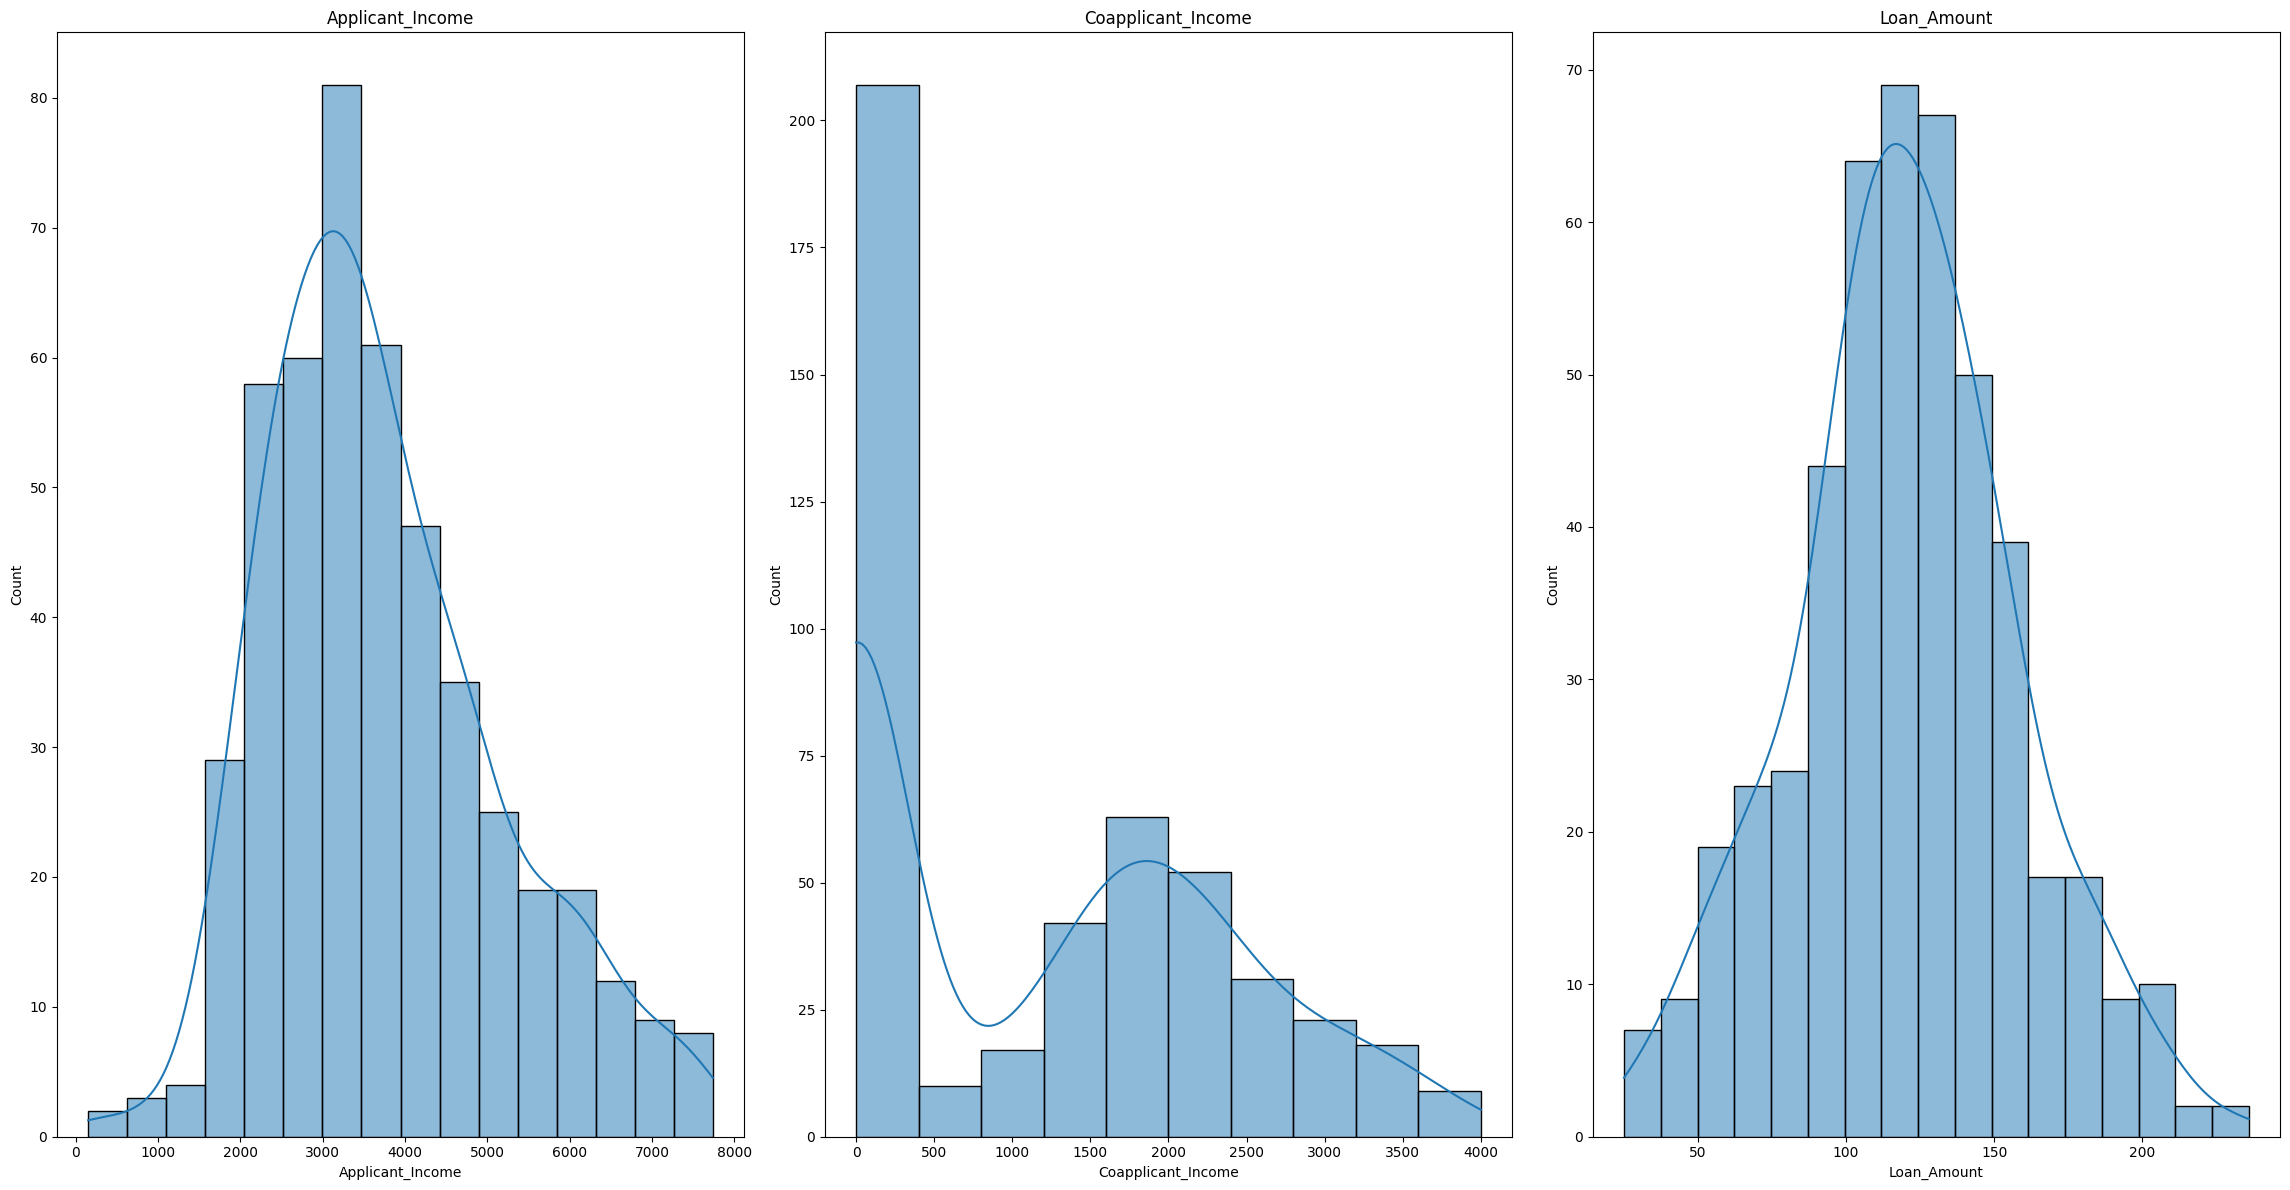

In [72]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=[23,12])
ax=ax.flatten()
index=0

col_displot_noOutlier = data_no_outlier[['Applicant_Income','Coapplicant_Income','Loan_Amount']]

for col,value in col_displot_noOutlier.items():
    sns.histplot(value, ax=ax[index], kde=True)
    ax[index].set_title(col)
    index+=1

plt.tight_layout()

In [73]:
data_no_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 472 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 472 non-null    object 
 1   Married                472 non-null    object 
 2   Dependents             472 non-null    int64  
 3   Education              472 non-null    object 
 4   Self_Employed          472 non-null    object 
 5   Applicant_Income       472 non-null    int64  
 6   Coapplicant_Income     472 non-null    float64
 7   Loan_Amount            472 non-null    float64
 8   Credit_History         472 non-null    float64
 9   Property_Area          472 non-null    object 
 10  Loan_Status            472 non-null    object 
 11  LoanAmount_Term_Categ  472 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 47.9+ KB


In [74]:
data_no_outlier.describe()

,Dependents,Applicant_Income,Coapplicant_Income,Loan_Amount,Credit_History
count,472.000000,472.000000,472.000000,472.000000,472.000000
mean,0.741525,3741.375000,1166.198983,120.372523,0.845339
std,0.990899,1411.974655,1175.372734,37.921445,0.361965
min,0.000000,150.000000,0.000000,25.000000,0.000000
25%,0.000000,2698.750000,0.000000,97.750000,1.000000
50%,0.000000,3466.000000,1221.000000,120.000000,1.000000
75%,1.000000,4587.250000,2083.000000,146.103041,1.000000
max,3.000000,7740.000000,4000.000000,236.000000,1.000000


In [75]:
backup_no_outlier = data_no_outlier.copy()

In [76]:
data.to_csv('Featured_Dataset.csv')

In [77]:
pd.read_csv('Dataset.csv').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
